In [239]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import KFold, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import PowerTransformer
import pickle



In [142]:
df=pd.read_csv(r"E:/data science/NBFI project/Train_Dataset.csv")
df.head()

ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509          6750        0.0         0.0          1.0        0.0   
1  12138936         20250        1.0         0.0          1.0        NaN   
2  12181264         18000        0.0         0.0          1.0        0.0   
3  12188929         15750        0.0         0.0          1.0        1.0   
4  12133385         33750        1.0         0.0          1.0        0.0   

   Child_Count Credit_Amount Loan_Annuity Accompany_Client  ...  \
0          0.0      61190.55      3416.85            Alone  ...   
1          0.0         15282      1826.55            Alone  ...   
2          1.0      59527.35       2788.2            Alone  ...   
3          0.0       53870.4      2295.45            Alone  ...   
4          2.0      133988.4      3547.35            Alone  ...   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes           Self-employed   
1                        Yes                     Yes              Government   
2                        Yes                     Yes           Self-employed   
3                        Yes                     Yes                     XNA   
4                        Yes                     Yes  Business Entity Type 3   

  Score_Source_1 Score_Source_2 Score_Source_3 Social_Circle_Default  \
0       0.568066       0.478787            NaN                0.0186   
1       0.563360       0.215068            NaN                   NaN   
2            NaN       0.552795       0.329655                0.0742   
3            NaN       0.135182       0.631355                   NaN   
4       0.508199       0.301182       0.355639                0.2021   

  Phone_Change Credit_Bureau Default  
0         63.0           NaN       0  
1          NaN           NaN       0  
2        277.0           0.0       0  
3       1700.0           3.0       0  
4        674.0           1.0       0  

[5 rows x 40 columns]

In [143]:
df.describe()

ID      Car_Owned     Bike_Owned    Active_Loan  \
count  1.218560e+05  118275.000000  118232.000000  118221.000000   
mean   1.216093e+07       0.342854       0.332262       0.499175   
std    3.517694e+04       0.474665       0.471026       0.500001   
min    1.210000e+07       0.000000       0.000000       0.000000   
25%    1.213046e+07       0.000000       0.000000       0.000000   
50%    1.216093e+07       0.000000       0.000000       0.000000   
75%    1.219139e+07       1.000000       1.000000       1.000000   
max    1.222186e+07       1.000000       1.000000       1.000000   

           House_Own    Child_Count  Own_House_Age     Mobile_Tag  \
count  118195.000000  118218.000000   41761.000000  121856.000000   
mean        0.692060       0.417779      12.157324       0.999992   
std         0.461644       0.728802      12.056079       0.002865   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       5.000000       1.000000   
50%         1.000000       0.000000       9.000000       1.000000   
75%         1.000000       1.000000      15.000000       1.000000   
max         1.000000      19.000000      69.000000       1.000000   

       Homephone_Tag  Workphone_Working  Client_Family_Members  \
count  121856.000000      121856.000000          119446.000000   
mean        0.200499           0.281201               2.154329   
std         0.400375           0.449587               0.912686   
min         0.000000           0.000000               1.000000   
25%         0.000000           0.000000               2.000000   
50%         0.000000           0.000000               2.000000   
75%         0.000000           1.000000               3.000000   
max         1.000000           1.000000              16.000000   

       Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  \
count       119447.000000            119428.000000             118193.000000   
mean             2.030038                 3.159736                 12.063100   
std              0.504407                 1.759045                  3.280695   
min              1.000000                 0.000000                  0.000000   
25%              2.000000                 2.000000                 10.000000   
50%              2.000000                 3.000000                 12.000000   
75%              2.000000                 5.000000                 14.000000   
max              3.000000                 6.000000                 23.000000   

       Score_Source_1  Score_Source_2  Social_Circle_Default   Phone_Change  \
count    53021.000000   116170.000000           59928.000000  118192.000000   
mean         0.501213        0.518625               0.117428     962.106056   
std          0.211204        0.740248               0.107974     827.976726   
min          0.014568        0.000005               0.000000       0.000000   
25%          0.333481        0.390164               0.057700     272.000000   
50%          0.504657        0.564978               0.088700     755.000000   
75%          0.673890        0.664011               0.148500    1570.000000   
max          0.945741      100.000000               1.000000    4185.000000   

       Credit_Bureau        Default  
count  103316.000000  121856.000000  
mean        1.891082       0.080792  
std         1.861921       0.272517  
min         0.000000       0.000000  
25%         0.000000       0.000000  
50%         1.000000       0.000000  
75%         3.000000       0.000000  
max        22.000000       1.000000

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [145]:
df.shape

(121856, 40)

In [146]:
df.value_counts()

ID        Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  Child_Count  Credit_Amount  Loan_Annuity  Accompany_Client  Client_Income_Type  Client_Education    Client_Marital_Status  Client_Gender  Loan_Contract_Type  Client_Housing_Type  Population_Region_Relative  Age_Days  Employed_Days  Registration_Days  ID_Days  Own_House_Age  Mobile_Tag  Homephone_Tag  Workphone_Working  Client_Occupation  Client_Family_Members  Cleint_City_Rating  Application_Process_Day  Application_Process_Hour  Client_Permanent_Match_Tag  Client_Contact_Work_Tag  Type_Organization       Score_Source_1  Score_Source_2  Score_Source_3  Social_Circle_Default  Phone_Change  Credit_Bureau  Default
12100006  20250.0        1.0        0.0         0.0          1.0        0.0          52128.0        3539.25       Alone             Service             Graduation dropout  M                      Female         CL                  Home                 0.010147                    15688     273            5928 

In [147]:
df.isnull().sum()

ID                                0
Client_Income                  3607
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                  3632
Loan_Annuity                   4812
Accompany_Client               1746
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative     4857
Age_Days                       3600
Employed_Days                  3649
Registration_Days              3614
ID_Days                        5968
Own_House_Age                 80095
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Occupation             41435
Client_Family_Members          2410
Cleint_City_Rating          

Looking at our null values ​​we can see that we have many null values ​​in certain columns ('Own_House_Age', 'Score_Source_1', 'Social_Circle_Default', 'Client_Occupation', 'Score_Source_3'), so let's remove those columns that don't make sense to be treated

In [148]:
df = df.drop(["Own_House_Age","Score_Source_1","Social_Circle_Default","Client_Occupation","Score_Source_3"],axis=1)
df

ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0       12142509          6750        0.0         0.0          1.0        0.0   
1       12138936         20250        1.0         0.0          1.0        NaN   
2       12181264         18000        0.0         0.0          1.0        0.0   
3       12188929         15750        0.0         0.0          1.0        1.0   
4       12133385         33750        1.0         0.0          1.0        0.0   
...          ...           ...        ...         ...          ...        ...   
121851  12207714         29250        0.0         0.0          NaN        1.0   
121852  12173765         15750        0.0         1.0          1.0        0.0   
121853  12103937          8100        0.0         1.0          0.0        1.0   
121854  12170623         38250        1.0         1.0          0.0        1.0   
121855  12105610          9000        1.0         1.0          1.0        1.0   

        Child_Count Credit_Amount Loan_Annuity Accompany_Client  ...  \
0               0.0      61190.55      3416.85            Alone  ...   
1               0.0         15282      1826.55            Alone  ...   
2               1.0      59527.35       2788.2            Alone  ...   
3               0.0       53870.4      2295.45            Alone  ...   
4               2.0      133988.4      3547.35            Alone  ...   
...             ...           ...          ...              ...  ...   
121851          0.0        107820       3165.3         Relative  ...   
121852          0.0        104256      3388.05            Alone  ...   
121853          1.0       55107.9      2989.35            Alone  ...   
121854          0.0         45000      2719.35            Alone  ...   
121855          1.0      62428.95      4201.65            Alone  ...   

       Cleint_City_Rating Application_Process_Day Application_Process_Hour  \
0                     2.0                     6.0                     17.0   
1                     2.0                     3.0                     10.0   
2                     2.0                     4.0                      NaN   
3                     3.0                     2.0                     15.0   
4                     1.0                     3.0                      NaN   
...                   ...                     ...                      ...   
121851                2.0                     4.0                     16.0   
121852                3.0                     4.0                     12.0   
121853                3.0                     5.0                     11.0   
121854                2.0                     1.0                     12.0   
121855                3.0                     4.0                      6.0   

       Client_Permanent_Match_Tag Client_Contact_Work_Tag  \
0                             Yes                     Yes   
1                             Yes                     Yes   
2                             Yes                     Yes   
3                             Yes                     Yes   
4                             Yes                     Yes   
...                           ...                     ...   
121851                        Yes                      No   
121852                        Yes                     Yes   
121853                         No                      No   
121854                        Yes                     Yes   
121855                        Yes                     Yes   

             Type_Organization Score_Source_2 Phone_Change Credit_Bureau  \
0                Self-employed       0.478787         63.0           NaN   
1                   Government       0.215068          NaN           NaN   
2                Self-employed       0.552795        277.0           0.0   
3                          XNA       0.135182       1700.0           3.0   
4       Business Entity Type 3       0.301182        674.0           1.0   
...                        ...            ...     

In [149]:
num_columns = df.select_dtypes(include=['int64','float64']).columns

print(num_columns)

Index(['ID', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Mobile_Tag', 'Homephone_Tag', 'Workphone_Working',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_2',
       'Phone_Change', 'Credit_Bureau', 'Default'],
      dtype='object')


In [150]:
cat_columns = df.select_dtypes(include='object').columns

print(cat_columns)

Index(['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Client_Permanent_Match_Tag',
       'Client_Contact_Work_Tag', 'Type_Organization'],
      dtype='object')


When we look at our variables, we can see that we have several values ​​that are inconsistent with the column type and the data value, so here we are treating all the data to leave them in the same pattern.

In [151]:
df['Client_Income'] = df['Client_Income'].str.strip('$')
df['Client_Income'].replace(to_replace='', value= None, regex=True, inplace=True)
df['Client_Income']=df['Client_Income'].fillna(df['Client_Income'].median())

In [152]:
df['Loan_Annuity'] = df['Loan_Annuity'].str.strip('$')
df['Loan_Annuity'] = df['Loan_Annuity'].str.strip('#VALUE!')
df['Loan_Annuity'].replace(to_replace='', value= None, regex=True, inplace=True)
df['Loan_Annuity']=df['Loan_Annuity'].fillna(df['Loan_Annuity'].median())


In [153]:
df['Credit_Amount'] = df['Credit_Amount'].str.strip('$')
df['Credit_Amount'].replace(to_replace='', value= None, regex=True, inplace=True)
df['Credit_Amount']=df['Credit_Amount'].fillna(df['Credit_Amount'].median())

In [154]:
df['Population_Region_Relative'] = df['Population_Region_Relative'].str.strip('#')
df['Population_Region_Relative'] = df['Population_Region_Relative'].str.strip('@')
df['Population_Region_Relative'] = df['Population_Region_Relative'].str.strip('x')
df['Population_Region_Relative'].replace(to_replace='', value= None, regex=True, inplace=True)
df['Population_Region_Relative']=df['Population_Region_Relative'].fillna(df['Population_Region_Relative'].median())

In [155]:
df['ID_Days'] = df['ID_Days'].str.strip('x')
df['ID_Days'].replace(to_replace='', value= None, regex=True, inplace=True)
df['ID_Days']=df['ID_Days'].fillna(df['ID_Days'].median())

In [156]:
df['Age_Days'] = df['Age_Days'].str.strip('x')
df['Age_Days'].replace(to_replace='', value= None, regex=True, inplace=True)
df['Age_Days']=df['Age_Days'].fillna(df['Age_Days'].median())

In [157]:
df['Employed_Days'] = df['Employed_Days'].str.strip('x')
df['Employed_Days'].replace(to_replace='', value= None, regex=True, inplace=True)
df['Employed_Days']=df['Employed_Days'].fillna(df['Employed_Days'].median())

In [158]:
df['Registration_Days'] = df['Registration_Days'].str.strip('x')
df['Registration_Days'].replace(to_replace='', value= None, regex=True, inplace=True)
df['Registration_Days']=df['Registration_Days'].fillna(df['Registration_Days'].median())

In [159]:
df['Accompany_Client'] = df['Accompany_Client'].str.strip('##')
df['Accompany_Client'].replace(to_replace='', value= None, regex=True, inplace=True)
df['Accompany_Client']=df['Accompany_Client'].fillna(df['Accompany_Client'].mode()[0])

In [160]:
df['Score_Source_2'].replace(to_replace='#', value= None, regex=True, inplace=True)
df['Score_Source_2']=df['Score_Source_2'].fillna(df['Score_Source_2'].median())

In [161]:
df.isnull().sum()

ID                                0
Client_Income                     0
Car_Owned                      3581
Bike_Owned                     3624
Active_Loan                    3635
House_Own                      3661
Child_Count                    3638
Credit_Amount                     0
Loan_Annuity                      0
Accompany_Client                  0
Client_Income_Type             3701
Client_Education               3645
Client_Marital_Status          3473
Client_Gender                  2413
Loan_Contract_Type             3651
Client_Housing_Type            3687
Population_Region_Relative        0
Age_Days                          0
Employed_Days                     0
Registration_Days                 0
ID_Days                           0
Mobile_Tag                        0
Homephone_Tag                     0
Workphone_Working                 0
Client_Family_Members          2410
Cleint_City_Rating             2409
Application_Process_Day        2428
Application_Process_Hour    

Here we are treating our null values, the continuous variables that make sense, we use the median, the categorical variables we use the mode to fill in the null values.

In [162]:
df['Credit_Bureau']=df['Credit_Bureau'].fillna(df['Credit_Bureau'].mode()[0])
df['Client_Income_Type']=df['Client_Income_Type'].fillna(df['Client_Income_Type'].mode()[0])
df['Bike_Owned']=df['Bike_Owned'].fillna(df['Bike_Owned'].mode()[0])
df['Type_Organization']=df['Type_Organization'].fillna(df['Type_Organization'].mode()[0])
df['Active_Loan']=df['Active_Loan'].fillna(df['Active_Loan'].mode()[0])
df['Client_Marital_Status']=df['Client_Marital_Status'].fillna(df['Client_Marital_Status'].mode()[0])
df['Client_Housing_Type']=df['Client_Housing_Type'].fillna(df['Client_Housing_Type'].mode()[0])
df['Application_Process_Hour']=df['Application_Process_Hour'].fillna(df['Application_Process_Hour'].mode()[0])
df['Car_Owned']=df['Car_Owned'].fillna(df['Car_Owned'].mode()[0])
df['Client_Education']=df['Client_Education'].fillna(df['Client_Education'].mode()[0])
df['House_Own']=df['House_Own'].fillna(df['House_Own'].mode()[0])
df['Loan_Contract_Type']=df['Loan_Contract_Type'].fillna(df['Loan_Contract_Type'].mode()[0])
df['Cleint_City_Rating']=df['Cleint_City_Rating'].fillna(df['Cleint_City_Rating'].mode()[0])
df['Client_Gender']=df['Client_Gender'].fillna(df['Client_Gender'].mode()[0])
df['Application_Process_Day']=df['Application_Process_Day'].fillna(df['Application_Process_Day'].mode()[0])
df['Application_Process_Day']=df['Accompany_Client'].fillna(df['Accompany_Client'].mode()[0])
df['Phone_Change']=df['Phone_Change'].fillna(df['Phone_Change'].median())
df['Child_Count']=df['Child_Count'].fillna(df['Child_Count'].median())
df['Client_Family_Members']=df['Client_Family_Members'].fillna(df['Client_Family_Members'].median())

In [163]:
df.isnull().sum()

ID                            0
Client_Income                 0
Car_Owned                     0
Bike_Owned                    0
Active_Loan                   0
House_Own                     0
Child_Count                   0
Credit_Amount                 0
Loan_Annuity                  0
Accompany_Client              0
Client_Income_Type            0
Client_Education              0
Client_Marital_Status         0
Client_Gender                 0
Loan_Contract_Type            0
Client_Housing_Type           0
Population_Region_Relative    0
Age_Days                      0
Employed_Days                 0
Registration_Days             0
ID_Days                       0
Mobile_Tag                    0
Homephone_Tag                 0
Workphone_Working             0
Client_Family_Members         0
Cleint_City_Rating            0
Application_Process_Day       0
Application_Process_Hour      0
Client_Permanent_Match_Tag    0
Client_Contact_Work_Tag       0
Type_Organization             0
Score_So

In [164]:
df

ID Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0       12142509          6750        0.0         0.0          1.0        0.0   
1       12138936         20250        1.0         0.0          1.0        1.0   
2       12181264         18000        0.0         0.0          1.0        0.0   
3       12188929         15750        0.0         0.0          1.0        1.0   
4       12133385         33750        1.0         0.0          1.0        0.0   
...          ...           ...        ...         ...          ...        ...   
121851  12207714         29250        0.0         0.0          0.0        1.0   
121852  12173765         15750        0.0         1.0          1.0        0.0   
121853  12103937          8100        0.0         1.0          0.0        1.0   
121854  12170623         38250        1.0         1.0          0.0        1.0   
121855  12105610          9000        1.0         1.0          1.0        1.0   

        Child_Count Credit_Amount Loan_Annuity Accompany_Client  ...  \
0               0.0      61190.55      3416.85            Alone  ...   
1               0.0         15282      1826.55            Alone  ...   
2               1.0      59527.35       2788.2            Alone  ...   
3               0.0       53870.4      2295.45            Alone  ...   
4               2.0      133988.4      3547.35            Alone  ...   
...             ...           ...          ...              ...  ...   
121851          0.0        107820      2499.75         Relative  ...   
121852          0.0        104256      2499.75            Alone  ...   
121853          1.0       55107.9      2499.75            Alone  ...   
121854          0.0         45000      2499.75            Alone  ...   
121855          1.0      62428.95      2499.75            Alone  ...   

       Cleint_City_Rating Application_Process_Day Application_Process_Hour  \
0                     2.0                   Alone                     17.0   
1                     2.0                   Alone                     10.0   
2                     2.0                   Alone                     10.0   
3                     3.0                   Alone                     15.0   
4                     1.0                   Alone                     10.0   
...                   ...                     ...                      ...   
121851                2.0                Relative                     16.0   
121852                3.0                   Alone                     12.0   
121853                3.0                   Alone                     11.0   
121854                2.0                   Alone                     12.0   
121855                3.0                   Alone                      6.0   

       Client_Permanent_Match_Tag Client_Contact_Work_Tag  \
0                             Yes                     Yes   
1                             Yes                     Yes   
2                             Yes                     Yes   
3                             Yes                     Yes   
4                             Yes                     Yes   
...                           ...                     ...   
121851                        Yes                      No   
121852                        Yes                     Yes   
121853                         No                      No   
121854                        Yes                     Yes   
121855                        Yes                     Yes   

             Type_Organization Score_Source_2 Phone_Change Credit_Bureau  \
0                Self-employed       0.478787         63.0           0.0   
1                   Government       0.215068        755.0           0.0   
2                Self-employed       0.552795        277.0           0.0   
3                          XNA       0.135182       1700.0           3.0   
4       Business Entity Type 3       0.301182        674.0           1.0   
...                        ...            ...     

Checking now, we can see that we don't have any more null values.

In [170]:
(df.isnull().sum()/len(df)).sort_values(ascending = False)

ID                            0.0
Application_Process_Day       0.0
ID_Days                       0.0
Mobile_Tag                    0.0
Homephone_Tag                 0.0
Workphone_Working             0.0
Client_Family_Members         0.0
Cleint_City_Rating            0.0
Application_Process_Hour      0.0
Employed_Days                 0.0
Client_Permanent_Match_Tag    0.0
Client_Contact_Work_Tag       0.0
Type_Organization             0.0
Score_Source_2                0.0
Phone_Change                  0.0
Credit_Bureau                 0.0
Registration_Days             0.0
Age_Days                      0.0
Client_Income                 0.0
Loan_Annuity                  0.0
Car_Owned                     0.0
Bike_Owned                    0.0
Active_Loan                   0.0
House_Own                     0.0
Child_Count                   0.0
Credit_Amount                 0.0
Accompany_Client              0.0
Population_Region_Relative    0.0
Client_Income_Type            0.0
Client_Educati

In [171]:
classes=df['Default'].value_counts()
classes

Default
0    112011
1      9845
Name: count, dtype: int64

In [172]:
normal_share=round(classes[0]/df['Default'].count()*100,2)
print(normal_share)

91.92


In [168]:
Default_share=round(classes[1]/df['Default'].count()*100,2)
print(Default_share)

8.08


<function matplotlib.pyplot.show(close=None, block=None)>

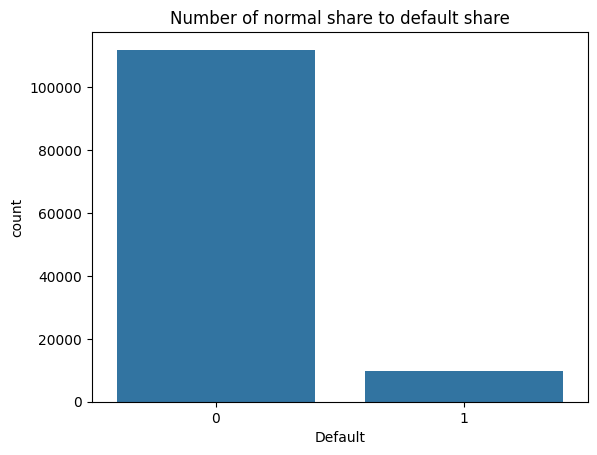

In [169]:
sns.countplot(x='Default',data=df)
plt.title('Number of normal share to default share')
plt.show

Categorical Variables

Looking at our categorical variables we can see that we have a predominance of some patterns, most of our customers do not own a car or bicycle, now when we look at own homes we see the opposite behavior, we can see that the active_loan variable is well distributed, we can see that the most of our data do not have children and the more they have, the smaller the amount of data, we can see that our data are predominantly male and people who have education as "secondary", we can also see that most of our data are from married people.

<Axes: title={'center': 'Variable Client_Gender'}, xlabel='Client_Gender', ylabel='count'>

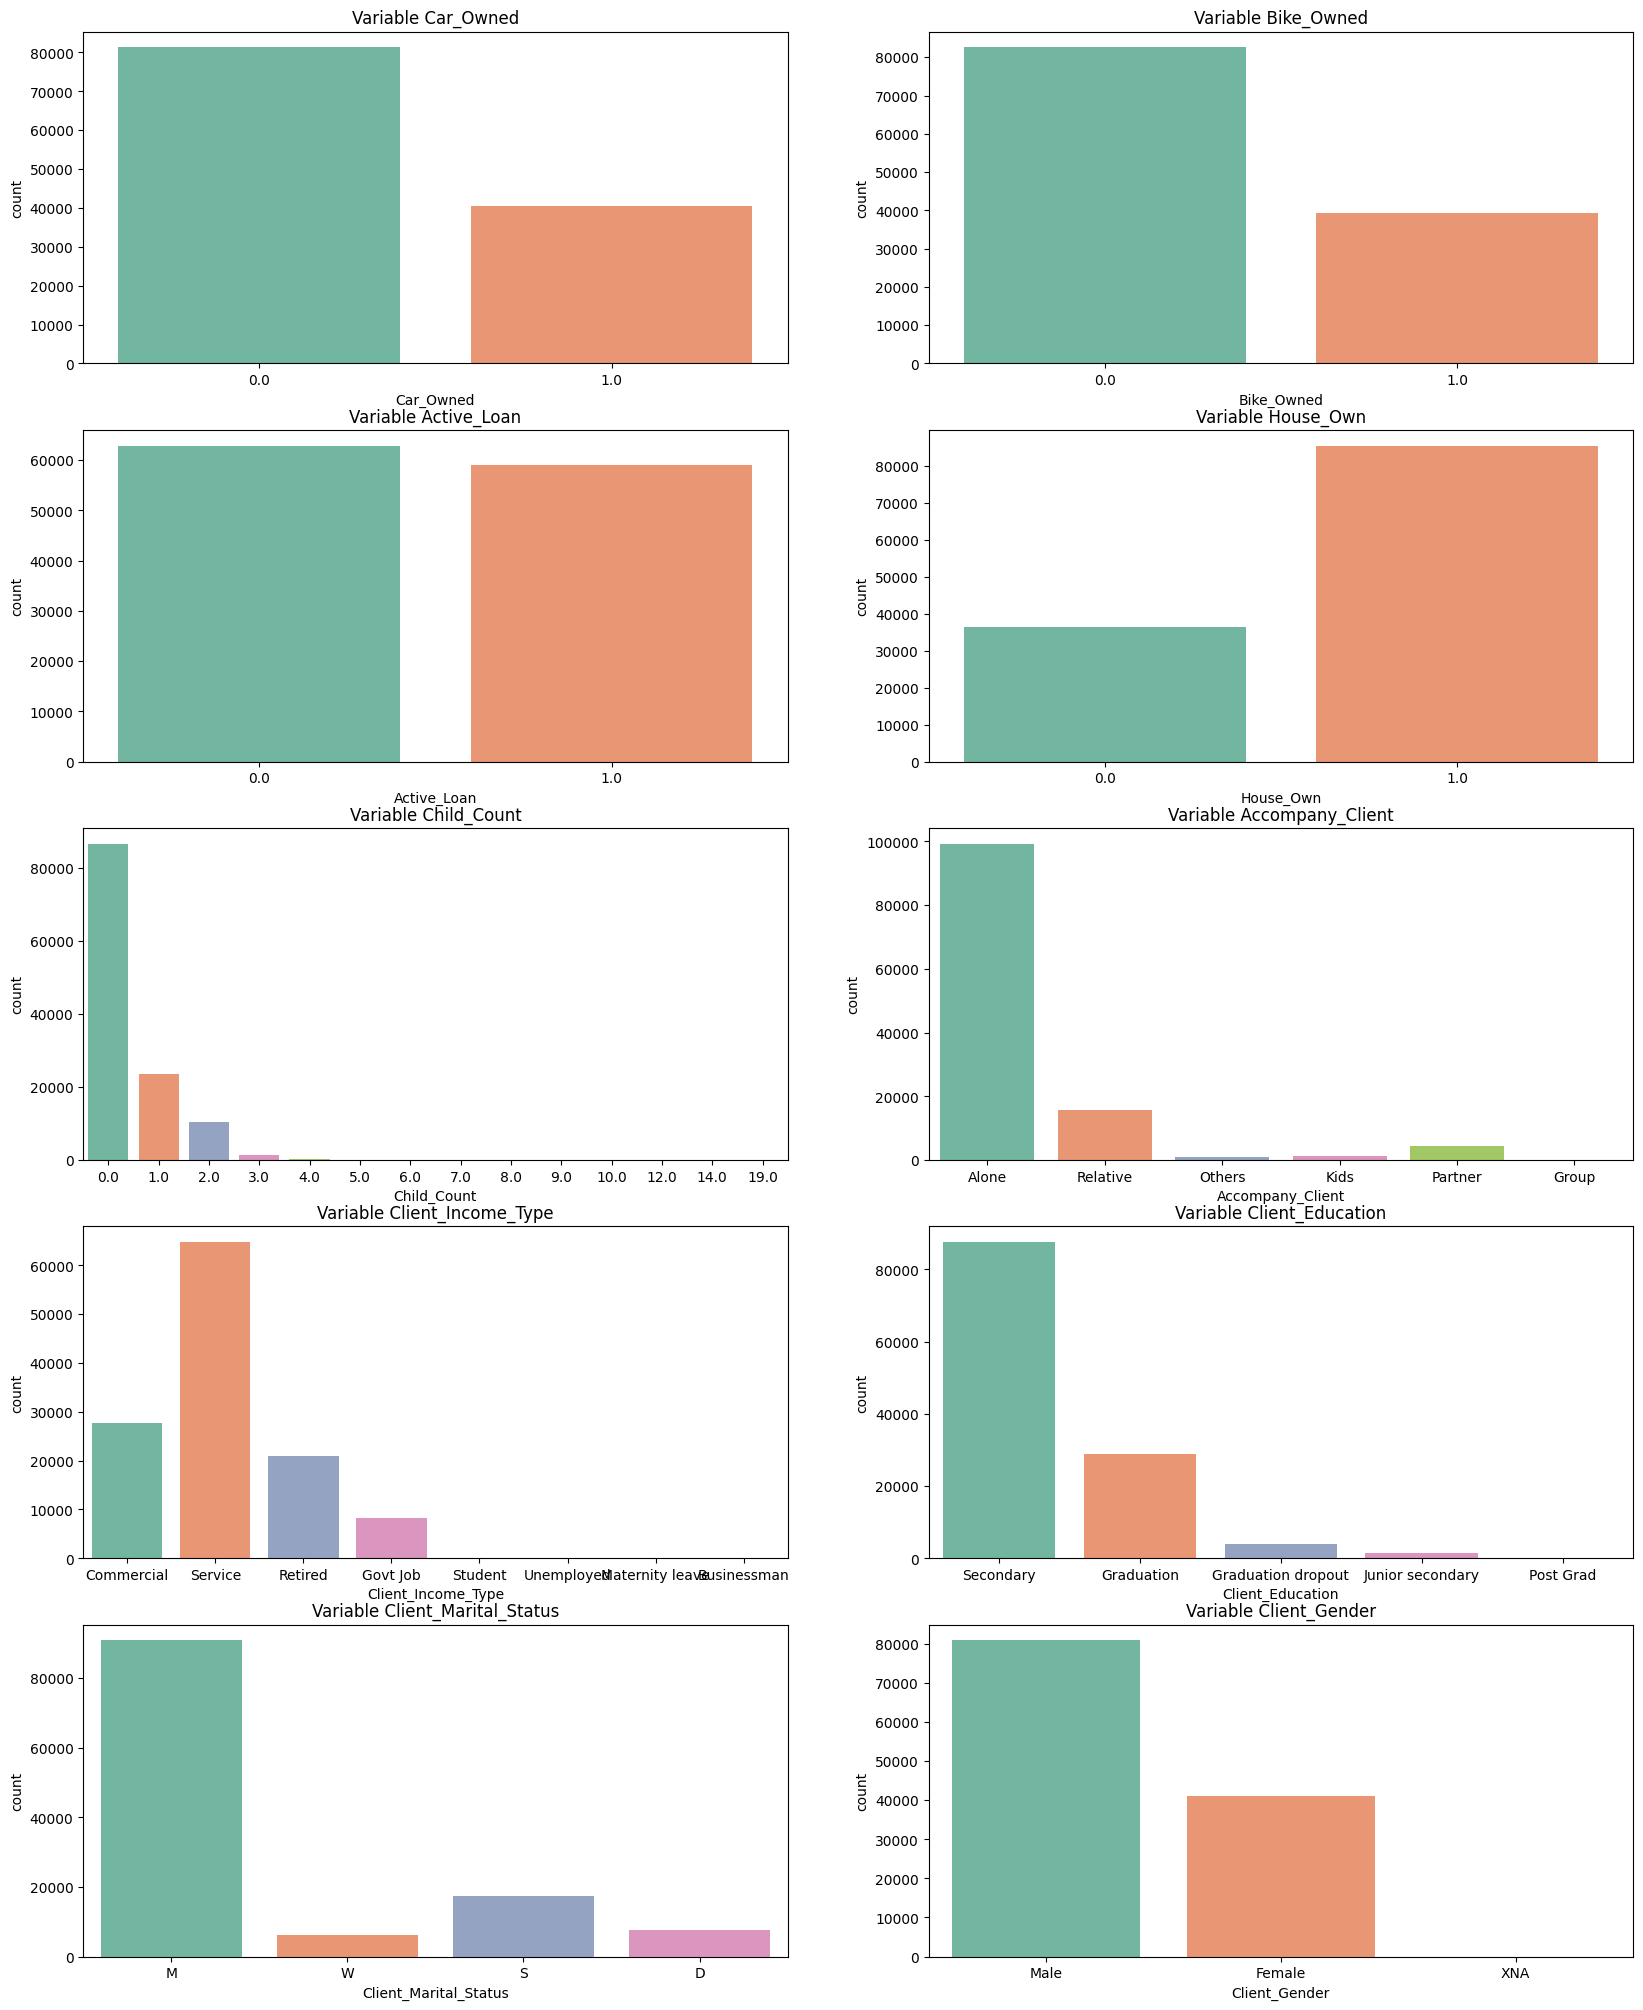

In [173]:
plt.figure(figsize = (20, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Car_Owned')
sns.countplot(x = 'Car_Owned', palette = 'Set2', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Bike_Owned')
sns.countplot(x = 'Bike_Owned', palette = 'Set2', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Active_Loan')
sns.countplot(x = 'Active_Loan', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable House_Own')
sns.countplot(x = 'House_Own', palette = 'Set2', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable Child_Count')
sns.countplot(x = 'Child_Count', palette = 'Set2', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable Accompany_Client')
sns.countplot(x = 'Accompany_Client', palette = 'Set2', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Client_Income_Type')
sns.countplot(x = 'Client_Income_Type', palette = 'Set2', data = df)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable Client_Education')
sns.countplot(x = 'Client_Education', palette = 'Set2', data = df)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Client_Marital_Status')
sns.countplot(x = 'Client_Marital_Status', palette = 'Set2', data = df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Client_Gender')
sns.countplot(x = 'Client_Gender', palette = 'Set2', data = df)

Looking at this other set of categorical variables, we can see that most of our data are from "CL" contracts, with Housing "Home" with Mobile Tag and without Homephone Tag, without Workphone Working with an average of 2 people in the family with Permanent Match Tag.

<Axes: title={'center': 'Variable Client_Permanent_Match_Tag'}, xlabel='Client_Permanent_Match_Tag', ylabel='count'>

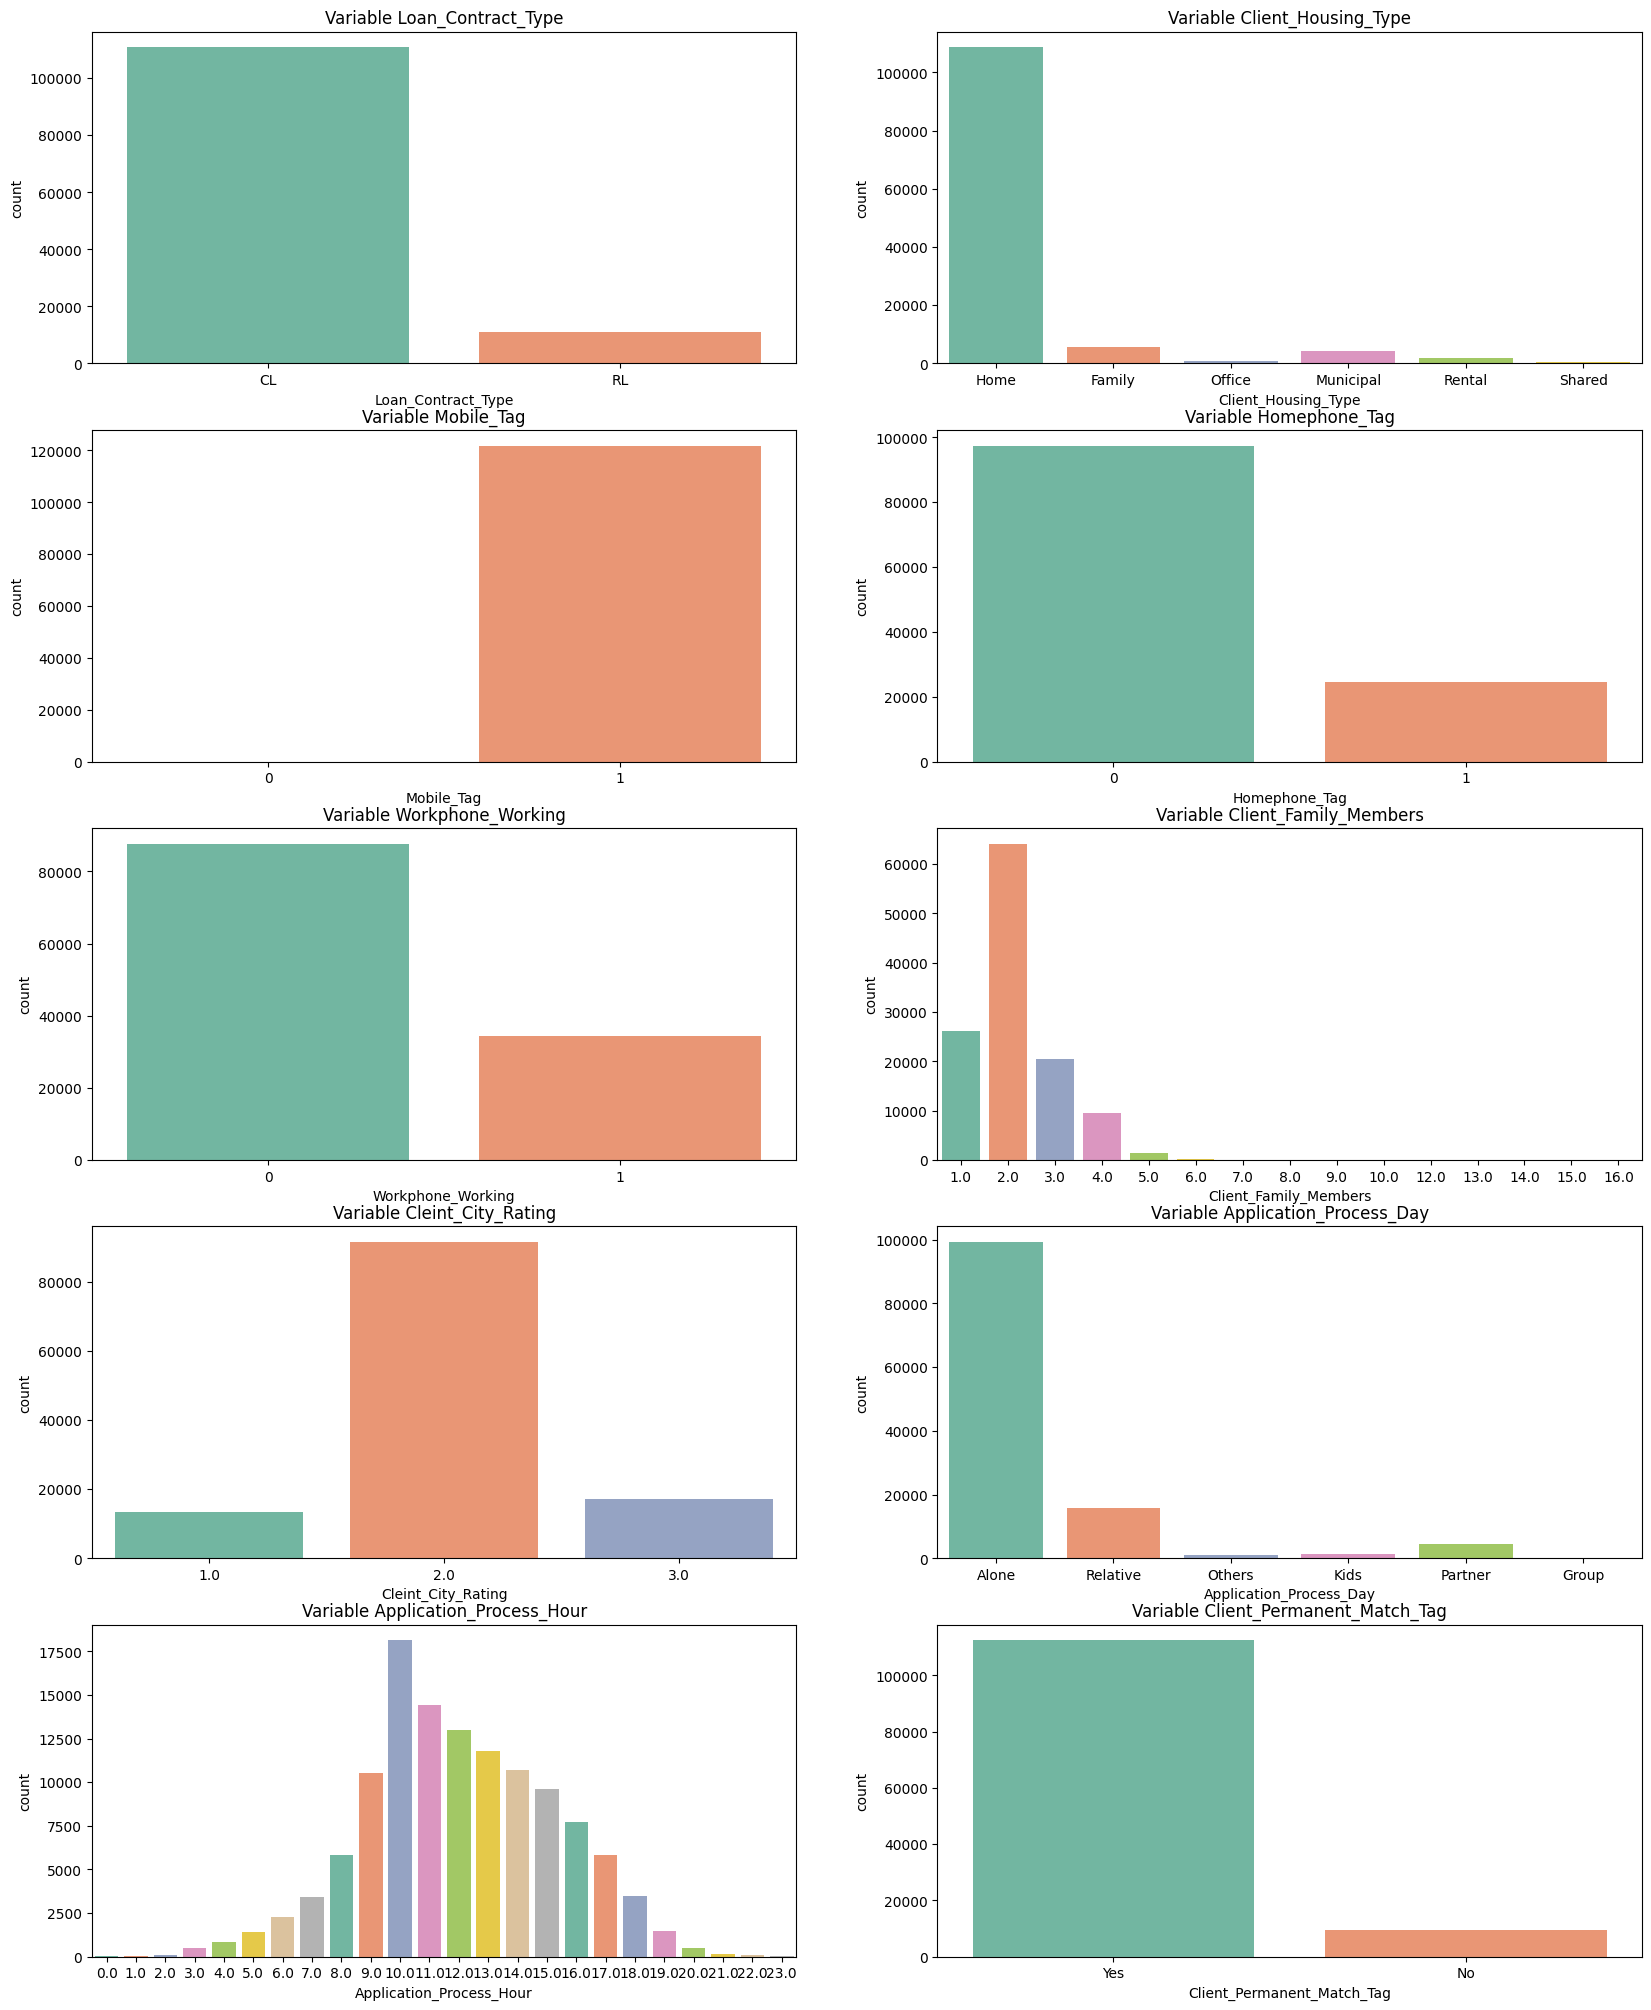

In [29]:
plt.figure(figsize = (20, 25))

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Loan_Contract_Type')
sns.countplot(x = 'Loan_Contract_Type', palette = 'Set2', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Client_Housing_Type')
sns.countplot(x = 'Client_Housing_Type', palette = 'Set2', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Mobile_Tag')
sns.countplot(x = 'Mobile_Tag', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable Homephone_Tag')
sns.countplot(x = 'Homephone_Tag', palette = 'Set2', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable Workphone_Working')
sns.countplot(x = 'Workphone_Working', palette = 'Set2', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable Client_Family_Members')
sns.countplot(x = 'Client_Family_Members', palette = 'Set2', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Cleint_City_Rating')
sns.countplot(x = 'Cleint_City_Rating', palette = 'Set2', data = df)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable Application_Process_Day')
sns.countplot(x = 'Application_Process_Day', palette = 'Set2', data = df)

plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Application_Process_Hour')
sns.countplot(x = 'Application_Process_Hour', palette = 'Set2', data = df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Client_Permanent_Match_Tag')
sns.countplot(x = 'Client_Permanent_Match_Tag', palette = 'Set2', data = df)

Looking at the Credit_Bureau variable, we can see that the higher the value, the smaller the amount of data, and when we look at our Target variable, we can see that our data is very unbalanced, we have many negative values ​​and few positive ones.

<Axes: title={'center': 'Variable Default'}, xlabel='Default', ylabel='count'>

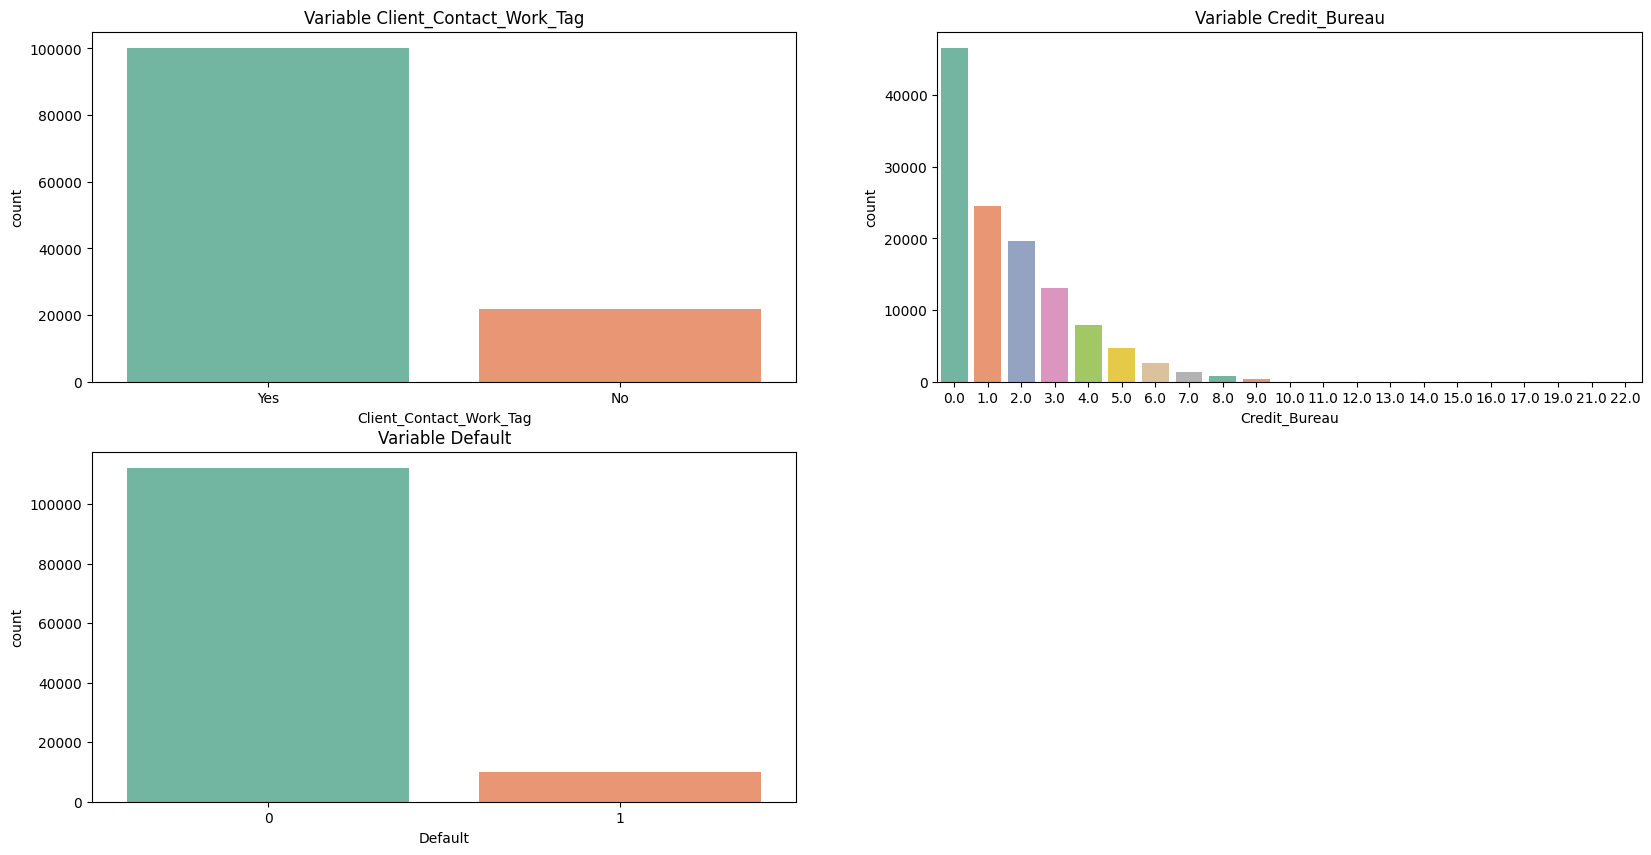

In [30]:
plt.figure(figsize = (20, 10))

plt.subplot(2, 2, 1)
plt.gca().set_title('Variable Client_Contact_Work_Tag')
sns.countplot(x = 'Client_Contact_Work_Tag', palette = 'Set2', data = df)

plt.subplot(2, 2, 2)
plt.gca().set_title('Variable Credit_Bureau')
sns.countplot(x = 'Credit_Bureau', palette = 'Set2', data = df)

plt.subplot(2, 2, 3)
plt.gca().set_title('Variable Default')
sns.countplot(x = 'Default', palette = 'Set2', data = df)

Transformationof  all our continuous variables to the Float type.

In [174]:
df['Client_Income'] = df['Client_Income'].astype('float')
df['Credit_Amount'] = df['Credit_Amount'].astype('float')
df['Loan_Annuity'] = df['Loan_Annuity'].astype('float')
df['Population_Region_Relative'] = df['Population_Region_Relative'].astype('float')
df['Age_Days'] = df['Age_Days'].astype('float')
df['Employed_Days'] = df['Employed_Days'].astype('float')
df['Registration_Days'] = df['Registration_Days'].astype('float')
df['ID_Days'] = df['ID_Days'].astype('float')
df['Score_Source_2'] = df['Score_Source_2'].astype('float')
df['Phone_Change'] = df['Phone_Change'].astype('float')

Here looking at our continuous variables we can see that we have some outliers, let's treat them first and then check the continuous variables again.

<Axes: xlabel='Phone_Change', ylabel='Count'>

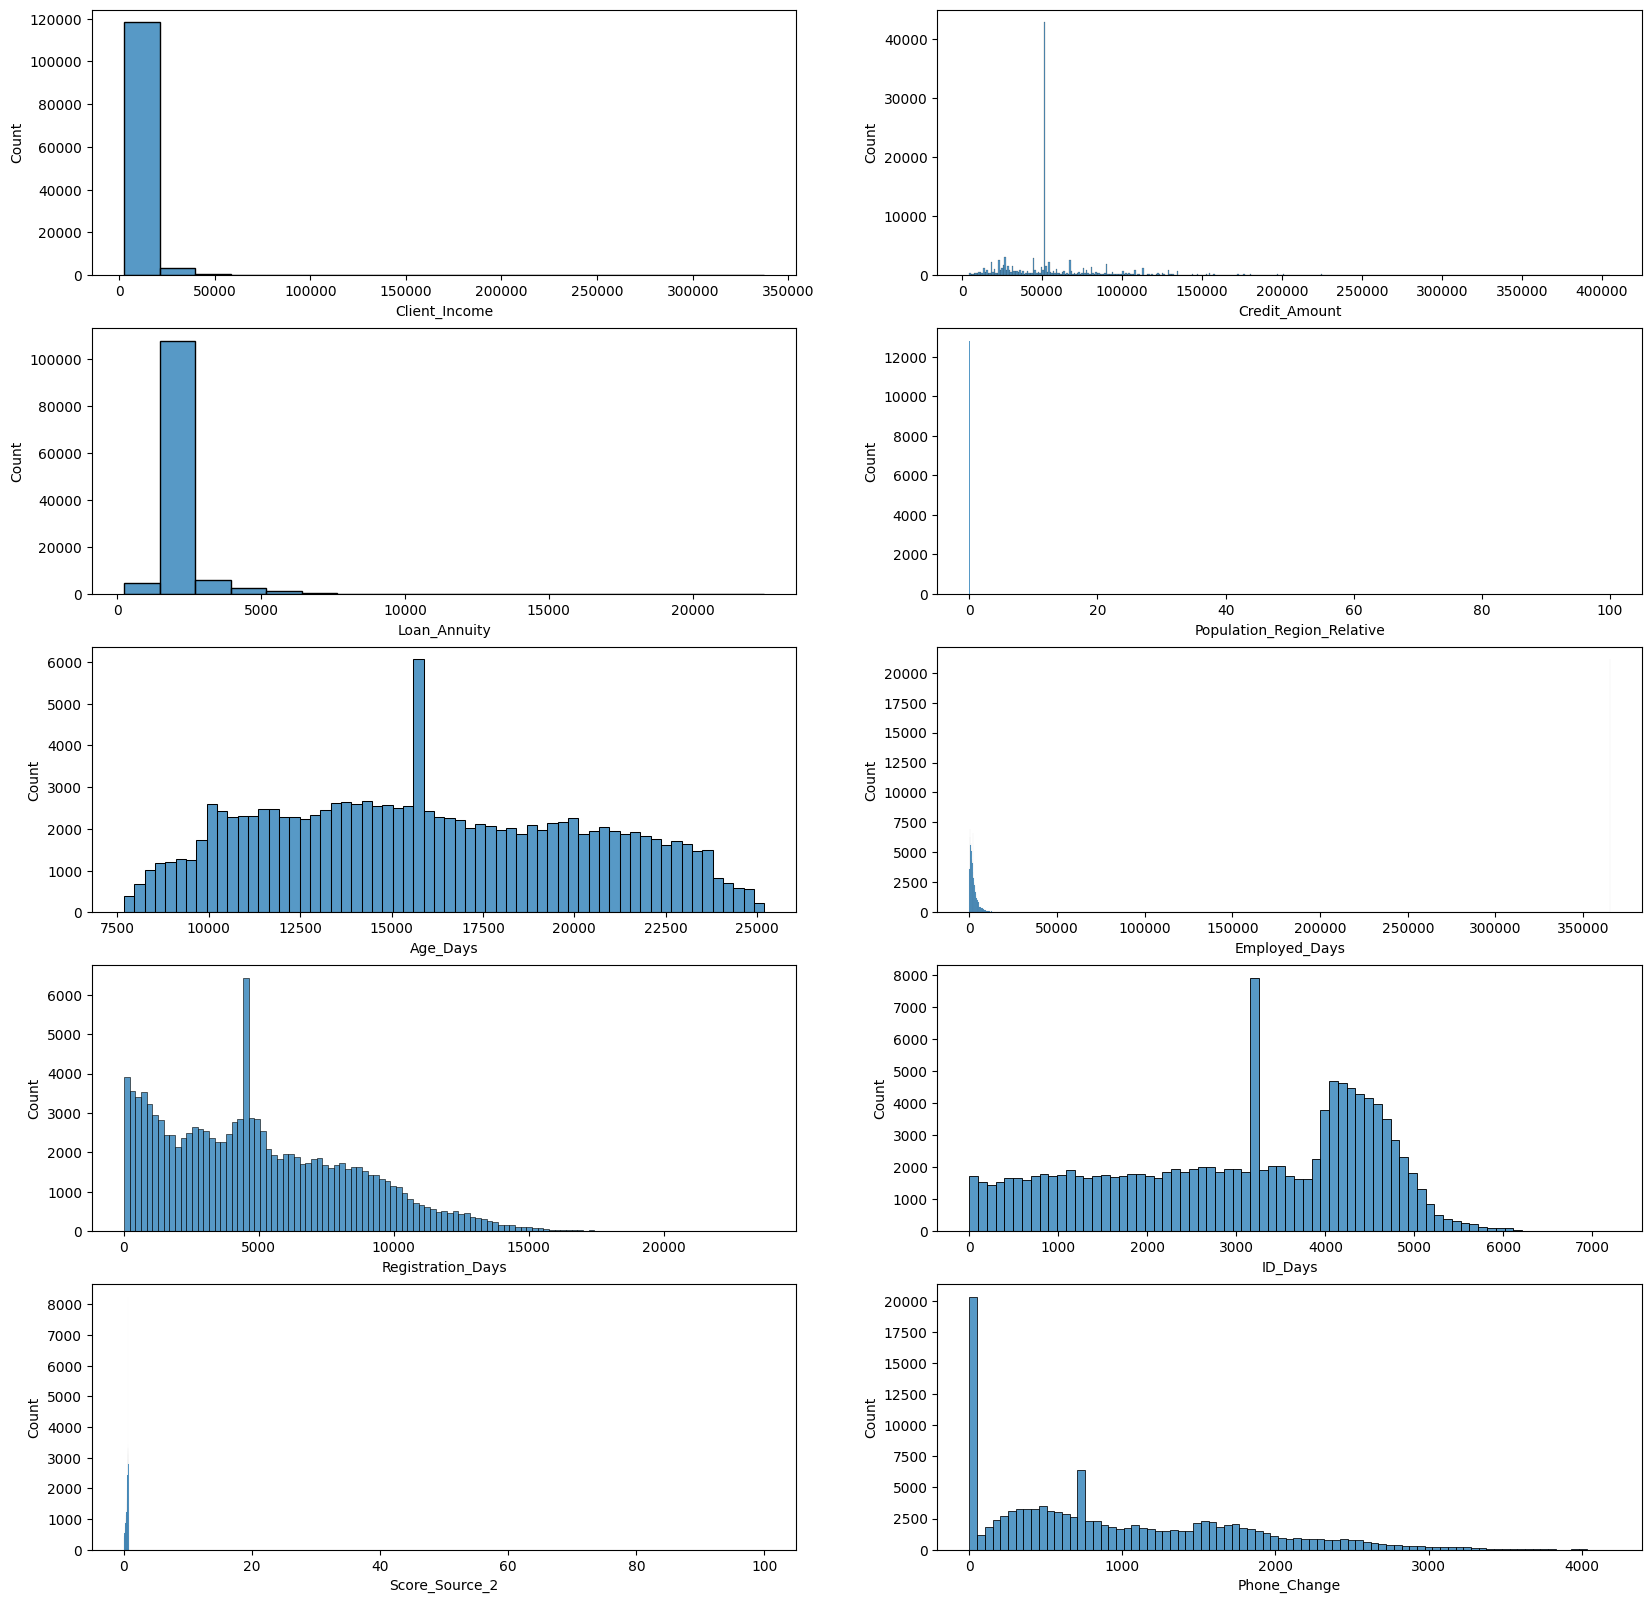

In [32]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 2, 1)
sns.histplot(x = df['Client_Income'], kde = False)

plt.subplot(5, 2, 2)
sns.histplot(x = df['Credit_Amount'], kde = False)

plt.subplot(5, 2, 3)
sns.histplot(x = df['Loan_Annuity'], kde = False)

plt.subplot(5, 2, 4)
sns.histplot(x = df['Population_Region_Relative'], kde = False)

plt.subplot(5, 2, 5)
sns.histplot(x = df['Age_Days'], kde = False)

plt.subplot(5, 2, 6)
sns.histplot(x = df['Employed_Days'], kde = False)

plt.subplot(5, 2, 7)
sns.histplot(x = df['Registration_Days'], kde = False)

plt.subplot(5, 2, 8)
sns.histplot(x = df['ID_Days'], kde = False)

plt.subplot(5, 2, 9)
sns.histplot(x = df['Score_Source_2'], kde = False)

plt.subplot(5, 2, 10)
sns.histplot(x = df['Phone_Change'], kde = False)

<Axes: title={'center': 'Boxplot Client_Income'}, xlabel='Client_Income'>

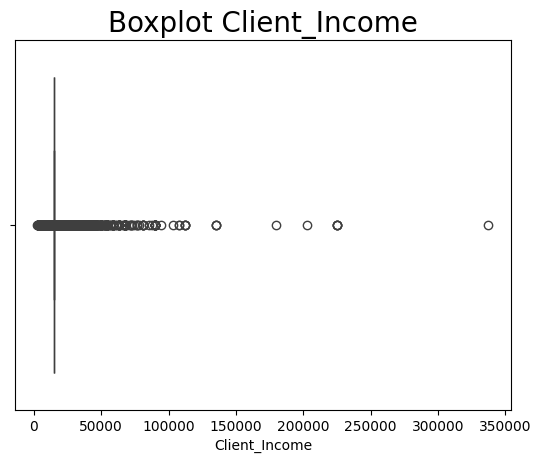

In [34]:
plt.title("Boxplot Client_Income", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Client_Income"])

In [175]:
df = df[df['Client_Income'] < 200000]

<Axes: title={'center': 'Boxplot Client_Income Without Outlier'}, xlabel='Client_Income'>

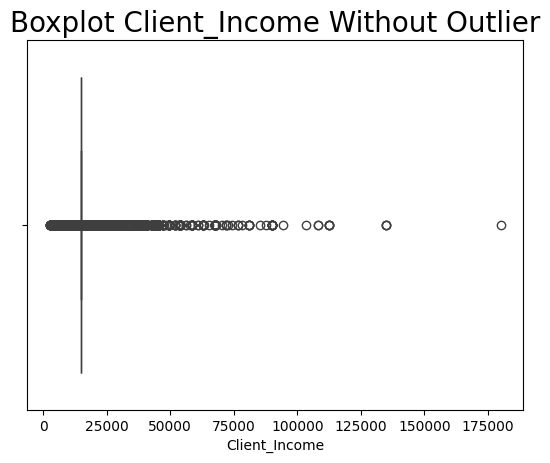

In [22]:
plt.title("Boxplot Client_Income Without Outlier", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Client_Income"])

<Axes: title={'center': 'Boxplot Credit_Amount'}, xlabel='Credit_Amount'>

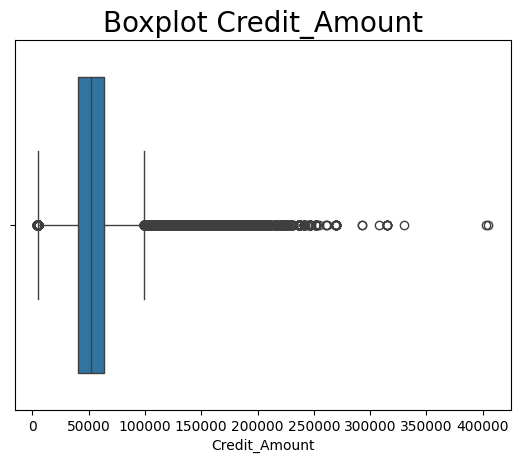

In [37]:
plt.title("Boxplot Credit_Amount", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Credit_Amount"])

<Axes: title={'center': 'Boxplot Loan_Annuity'}, xlabel='Loan_Annuity'>

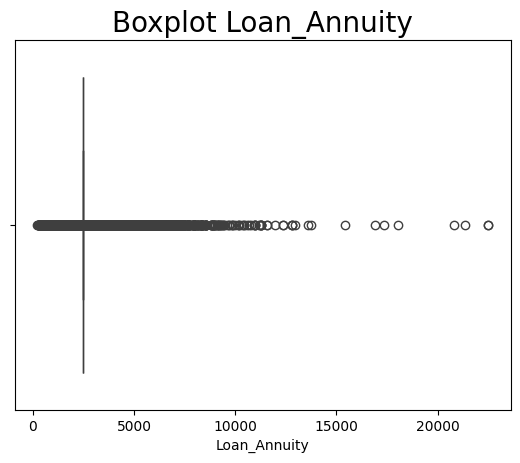

In [38]:

plt.title("Boxplot Loan_Annuity", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Loan_Annuity"])

<Axes: title={'center': 'Boxplot Population_Region_Relative'}, xlabel='Population_Region_Relative'>

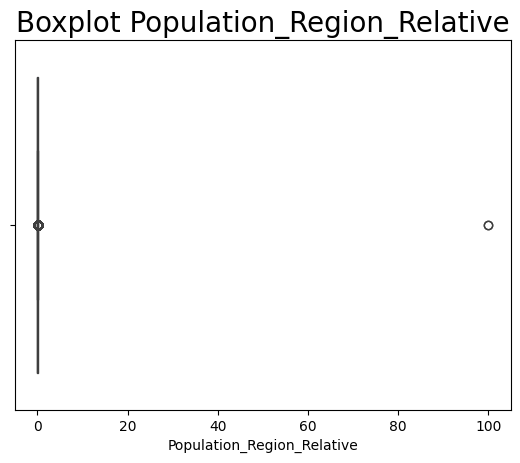

In [39]:
plt.title("Boxplot Population_Region_Relative", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Population_Region_Relative"])

In [176]:
df = df[df['Population_Region_Relative'] < 20]

<Axes: title={'center': 'Boxplot Population_Region_Relative Without Outlier'}, xlabel='Population_Region_Relative'>

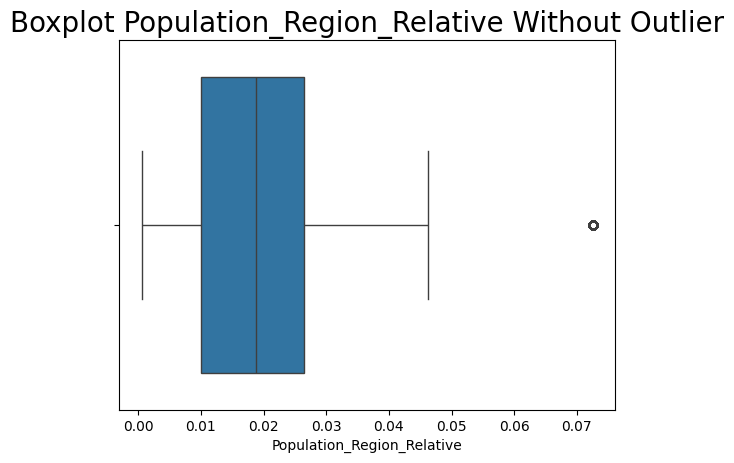

In [41]:
plt.title("Boxplot Population_Region_Relative Without Outlier", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Population_Region_Relative"])

<Axes: title={'center': 'Boxplot Age_Days'}, xlabel='Age_Days'>

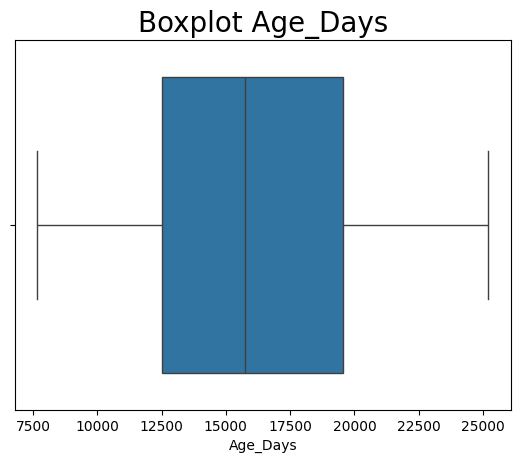

In [42]:
plt.title("Boxplot Age_Days", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Age_Days"])

<Axes: title={'center': 'Boxplot Employed_Days'}, xlabel='Employed_Days'>

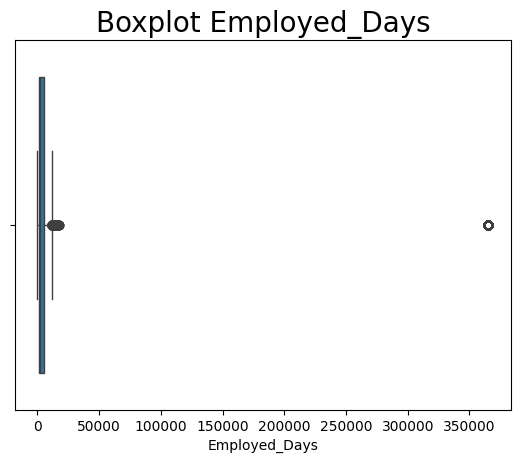

In [220]:
plt.title("Boxplot Employed_Days", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Employed_Days"])

In [177]:
df = df[df['Employed_Days'] < 100000]

<Axes: title={'center': 'Boxplot Employed_Days Without Outlier'}, xlabel='Employed_Days'>

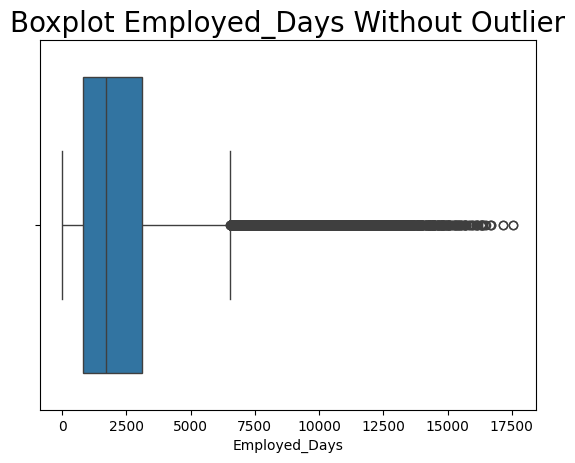

In [46]:
plt.title("Boxplot Employed_Days Without Outlier", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Employed_Days"])

<Axes: title={'center': 'Boxplot Registration_Days'}, xlabel='Registration_Days'>

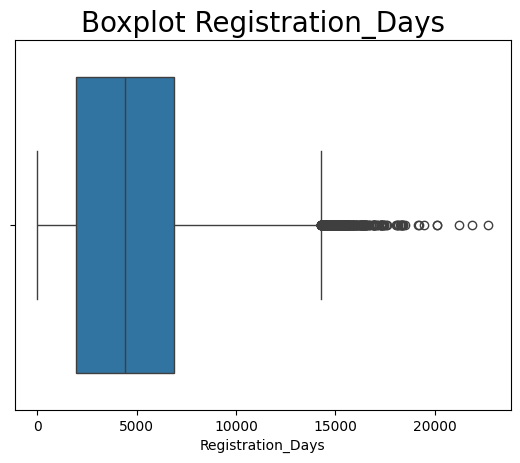

In [48]:
plt.title("Boxplot Registration_Days", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Registration_Days"])

<Axes: title={'center': 'Boxplot ID_Days'}, xlabel='ID_Days'>

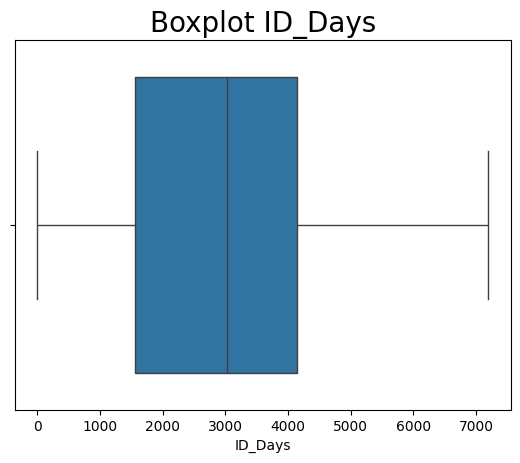

In [49]:

plt.title("Boxplot ID_Days", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["ID_Days"])

<Axes: title={'center': 'Boxplot Score_Source_2'}, xlabel='Score_Source_2'>

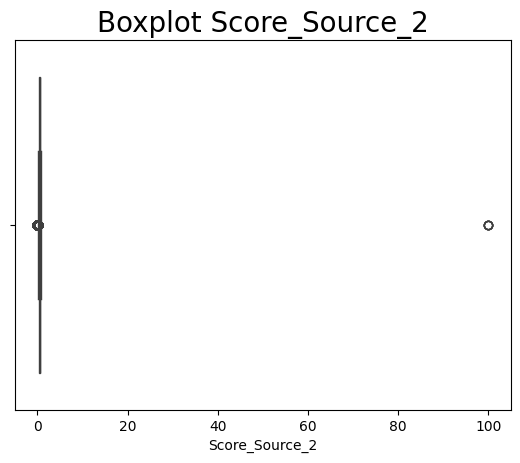

In [50]:

plt.title("Boxplot Score_Source_2", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Score_Source_2"])

In [178]:
df = df[df['Score_Source_2'] < 20]

<Axes: title={'center': 'Boxplot Score_Source_2 Without Outliers'}, xlabel='Score_Source_2'>

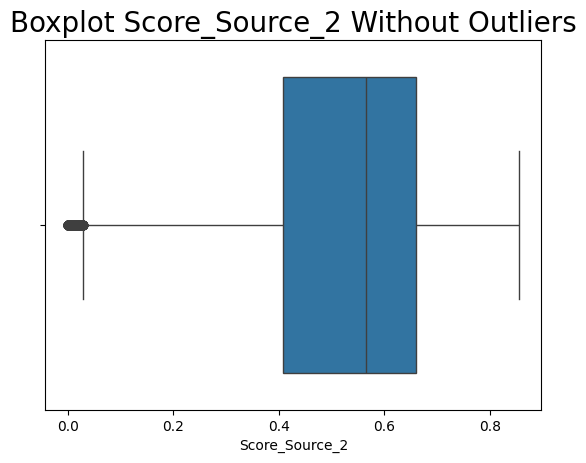

In [52]:
plt.title("Boxplot Score_Source_2 Without Outliers", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Score_Source_2"])

<Axes: title={'center': 'Boxplot Phone_Change'}, xlabel='Phone_Change'>

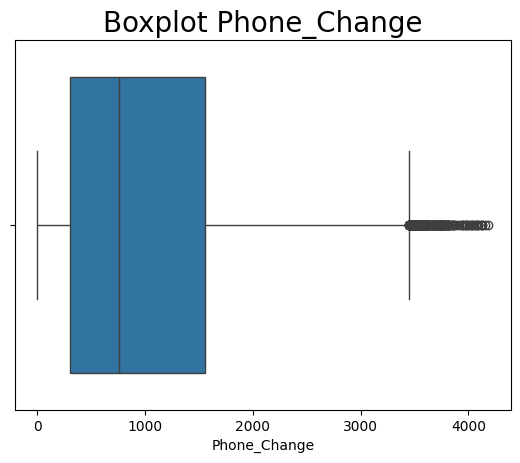

In [53]:
plt.title("Boxplot Phone_Change", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Phone_Change"])

<Axes: title={'center': 'Boxplot Credit_Bureau'}, xlabel='Credit_Bureau'>

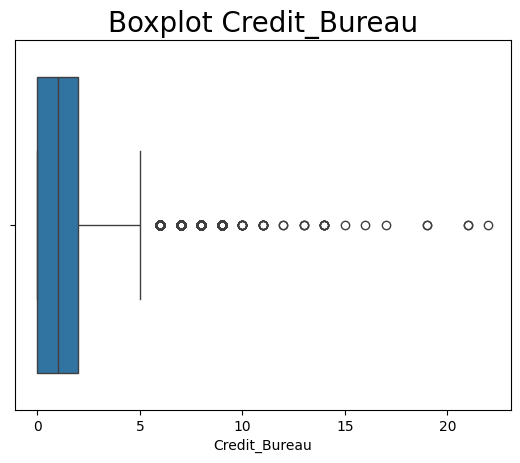

In [54]:
plt.title("Boxplot Credit_Bureau", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Credit_Bureau"])

<Axes: title={'center': 'Boxplot Child_Count'}, xlabel='Child_Count'>

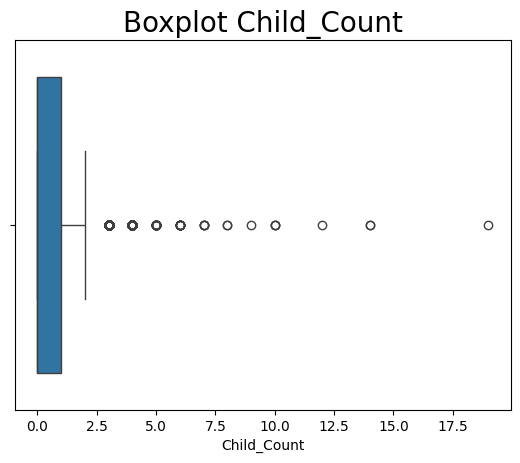

In [55]:
plt.title("Boxplot Child_Count", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Child_Count"])

In [18]:
df = df[df['Child_Count'] < 10]

<Axes: title={'center': 'Boxplot Child_Count Without Outlier'}, xlabel='Child_Count'>

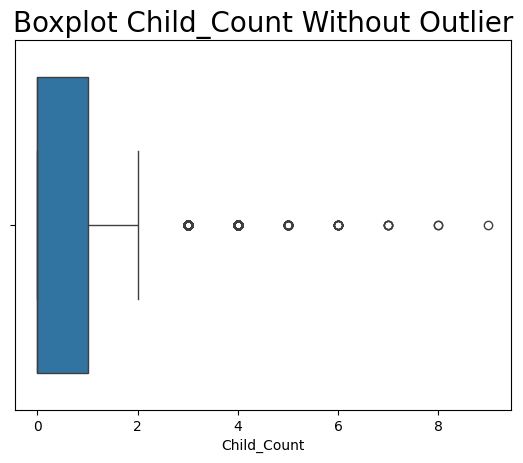

In [57]:
plt.title("Boxplot Child_Count Without Outlier", fontdict = {'fontsize': 20})
plt.ticklabel_format(style='plain', axis='x')
sns.boxplot(x=df["Child_Count"])

Looking at our continuous variables we can also see some patterns in the data, in the variables Credit_Amount, Loan_Annuitym, Employed_Days, Registration Days and Phone Change we can see that the greater the amount of data the smaller the amount of values, our other variables some are even fine balanced.

<Axes: xlabel='Phone_Change', ylabel='Count'>

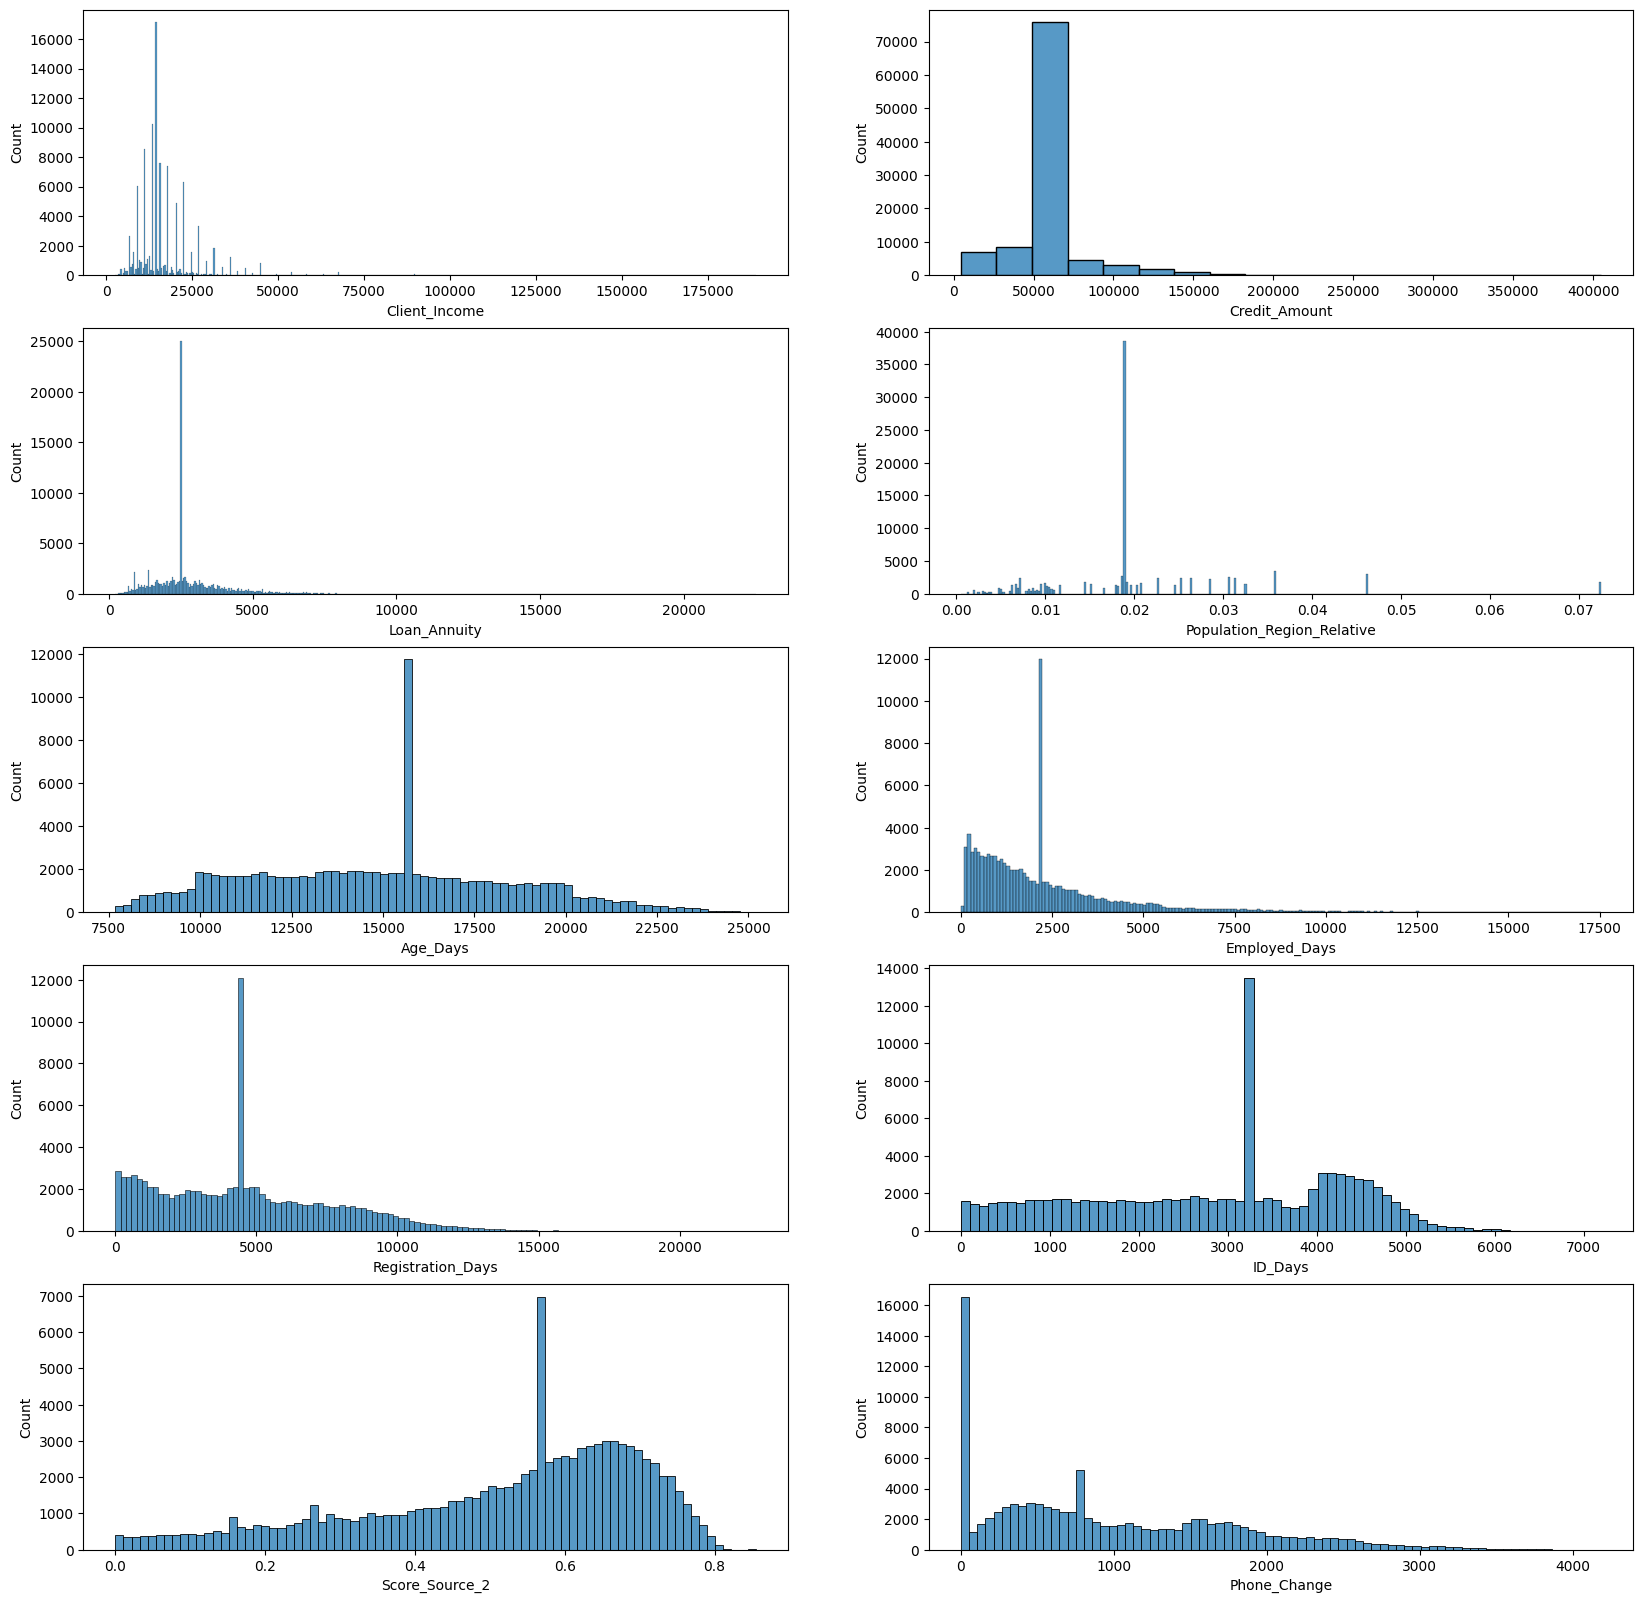

In [179]:
plt.figure(figsize = (20, 20))

plt.subplot(5, 2, 1)
sns.histplot(x = df['Client_Income'], kde = False)

plt.subplot(5, 2, 2)
sns.histplot(x = df['Credit_Amount'], kde = False)

plt.subplot(5, 2, 3)
sns.histplot(x = df['Loan_Annuity'], kde = False)

plt.subplot(5, 2, 4)
sns.histplot(x = df['Population_Region_Relative'], kde = False)

plt.subplot(5, 2, 5)
sns.histplot(x = df['Age_Days'], kde = False)

plt.subplot(5, 2, 6)
sns.histplot(x = df['Employed_Days'], kde = False)

plt.subplot(5, 2, 7)
sns.histplot(x = df['Registration_Days'], kde = False)

plt.subplot(5, 2, 8)
sns.histplot(x = df['ID_Days'], kde = False)

plt.subplot(5, 2, 9)
sns.histplot(x = df['Score_Source_2'], kde = False)

plt.subplot(5, 2, 10)
sns.histplot(x = df['Phone_Change'], kde = False)

Bivariate Analysis.


Comparing our categorical variables with our target variable, we can see that we do not have a variable that differs greatly in terms of negative and positive results.

<Axes: title={'center': 'Variable Client_Gender'}, xlabel='Client_Gender', ylabel='count'>

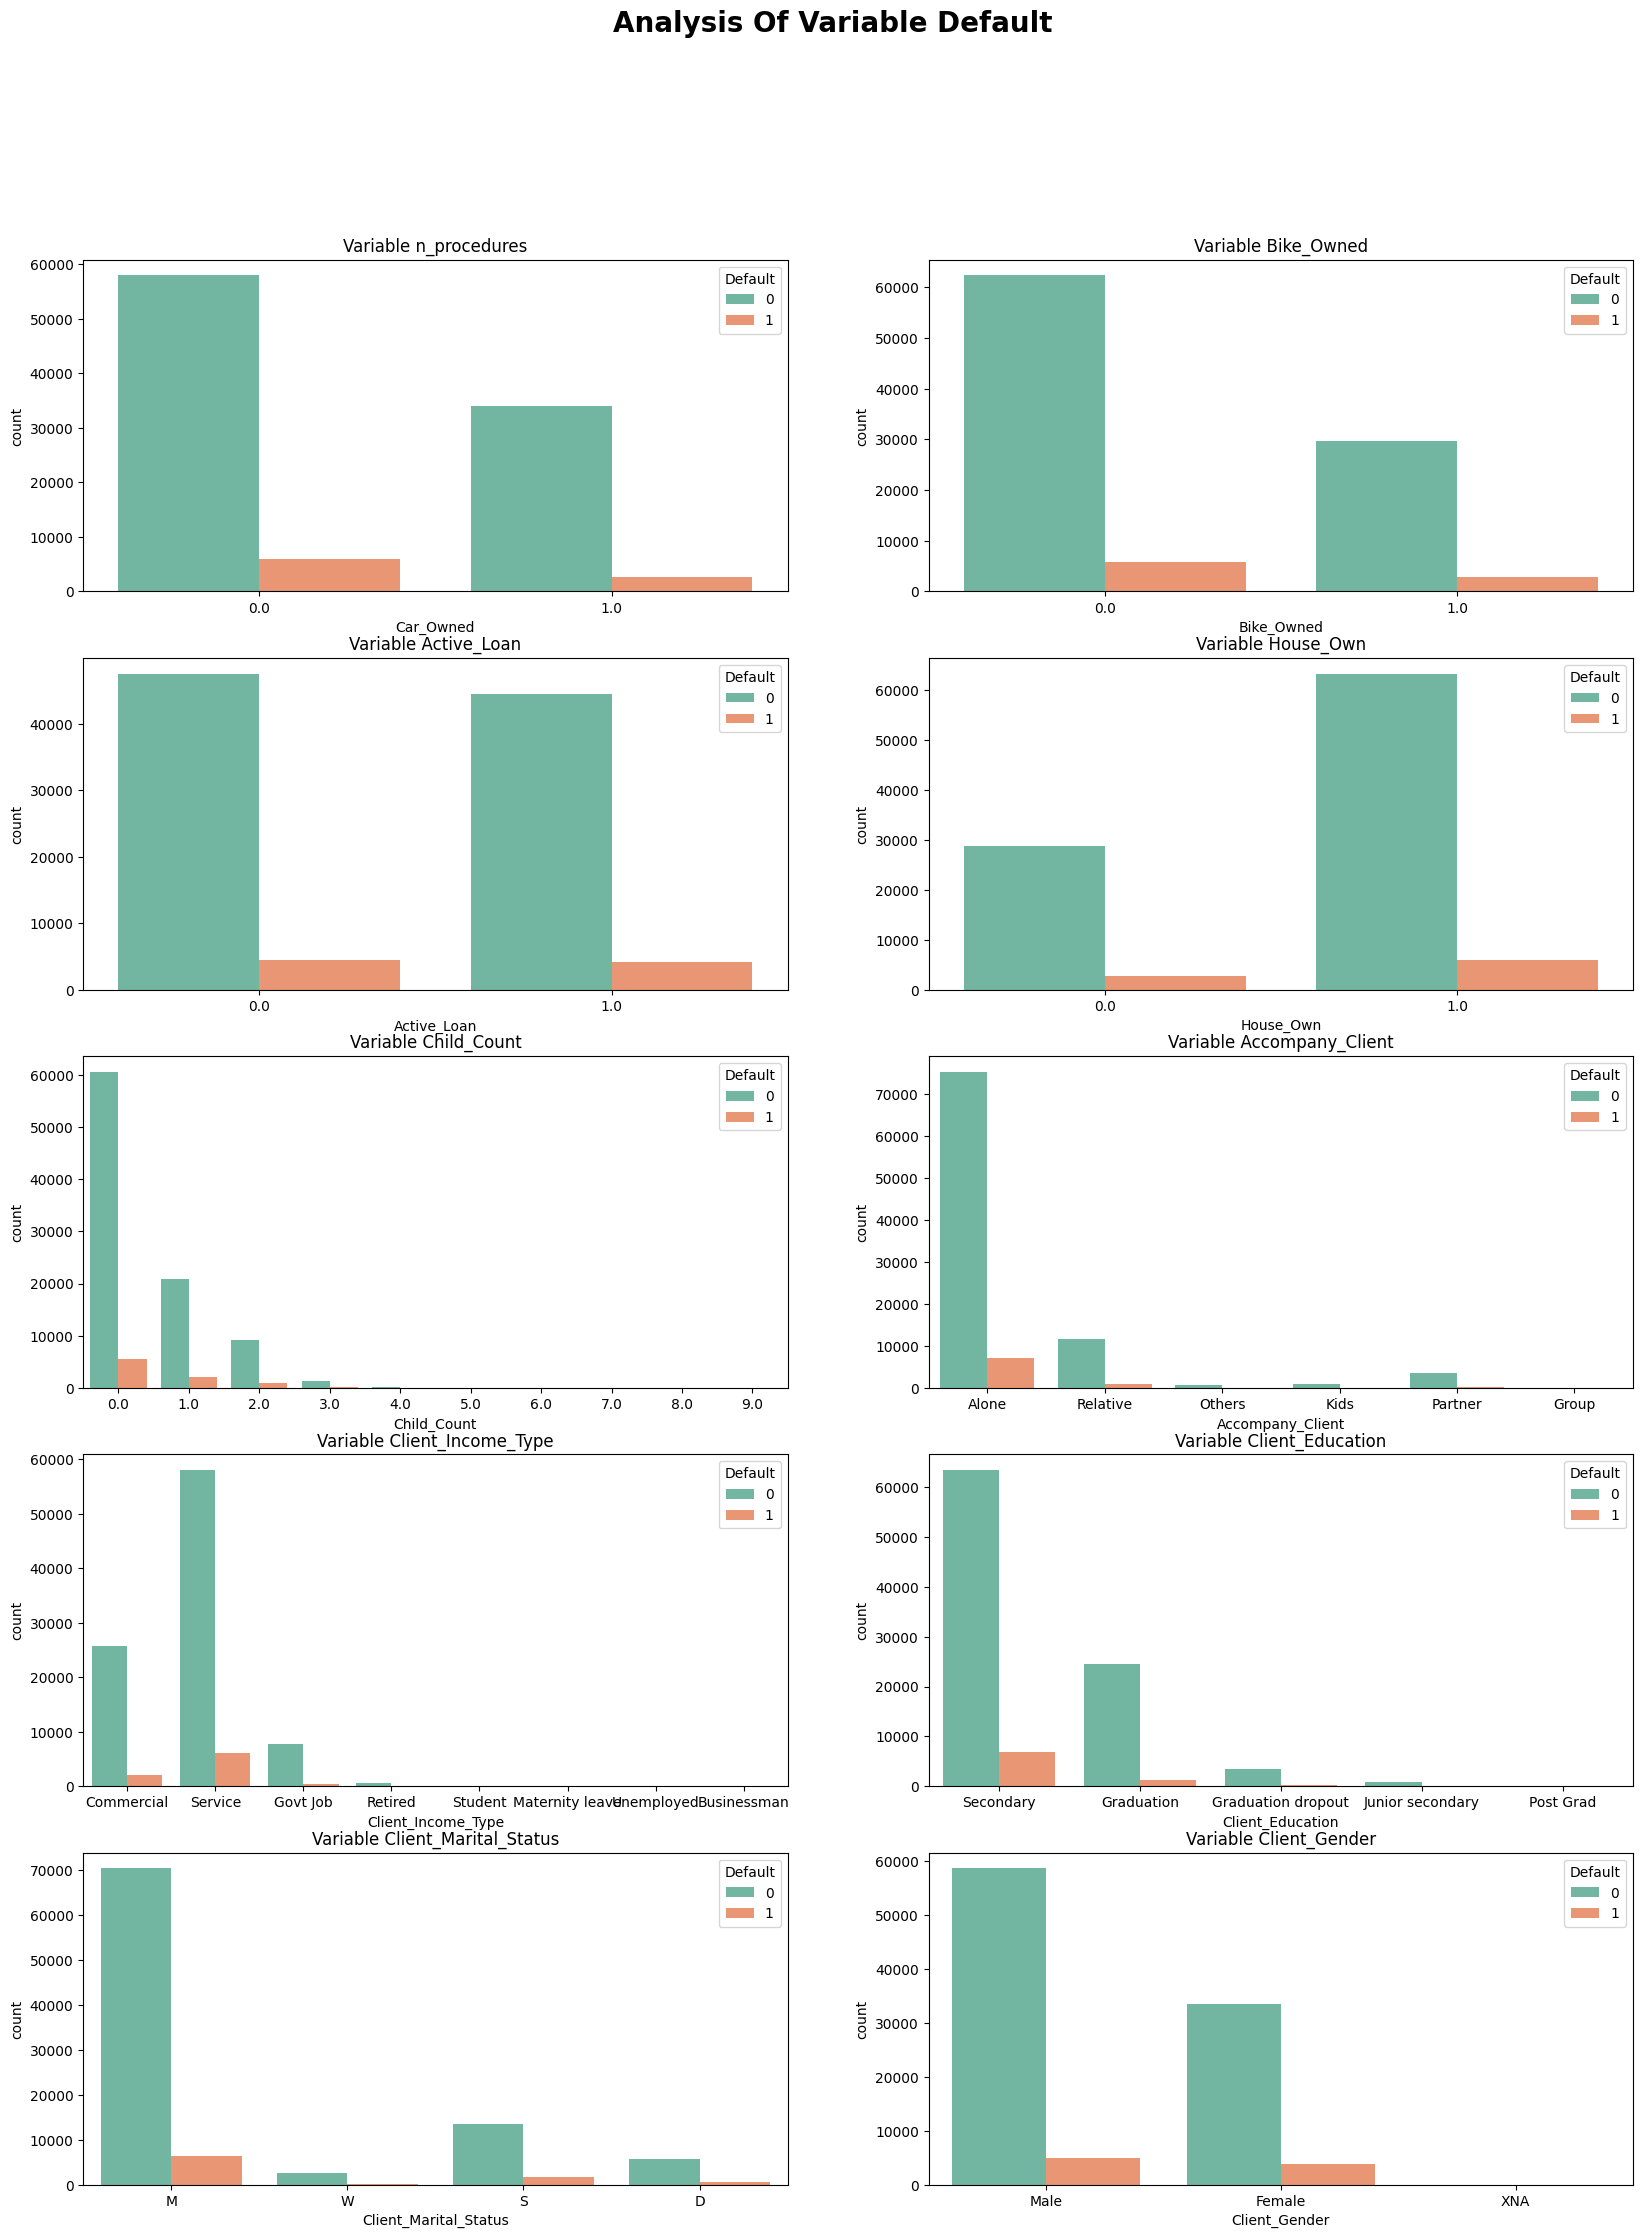

In [59]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Default",fontweight="bold", fontsize=20)

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable n_procedures')
sns.countplot(x = 'Car_Owned', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Bike_Owned')
sns.countplot(x = 'Bike_Owned', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Active_Loan')
sns.countplot(x = 'Active_Loan', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable House_Own')
sns.countplot(x = 'House_Own', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable Child_Count')
sns.countplot(x = 'Child_Count', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable Accompany_Client')
sns.countplot(x = 'Accompany_Client', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Client_Income_Type')
sns.countplot(x = 'Client_Income_Type', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable Client_Education')
sns.countplot(x = 'Client_Education', hue = 'Default', palette = 'Set2', data = df)
            
plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Client_Marital_Status')
sns.countplot(x = 'Client_Marital_Status', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Client_Gender')
sns.countplot(x = 'Client_Gender', hue = 'Default', palette = 'Set2', data = df)

Here in these variables there is almost same pattern as the variables above, there is no very big distortion.

<Axes: title={'center': 'Variable Client_Permanent_Match_Tag'}, xlabel='Client_Permanent_Match_Tag', ylabel='count'>

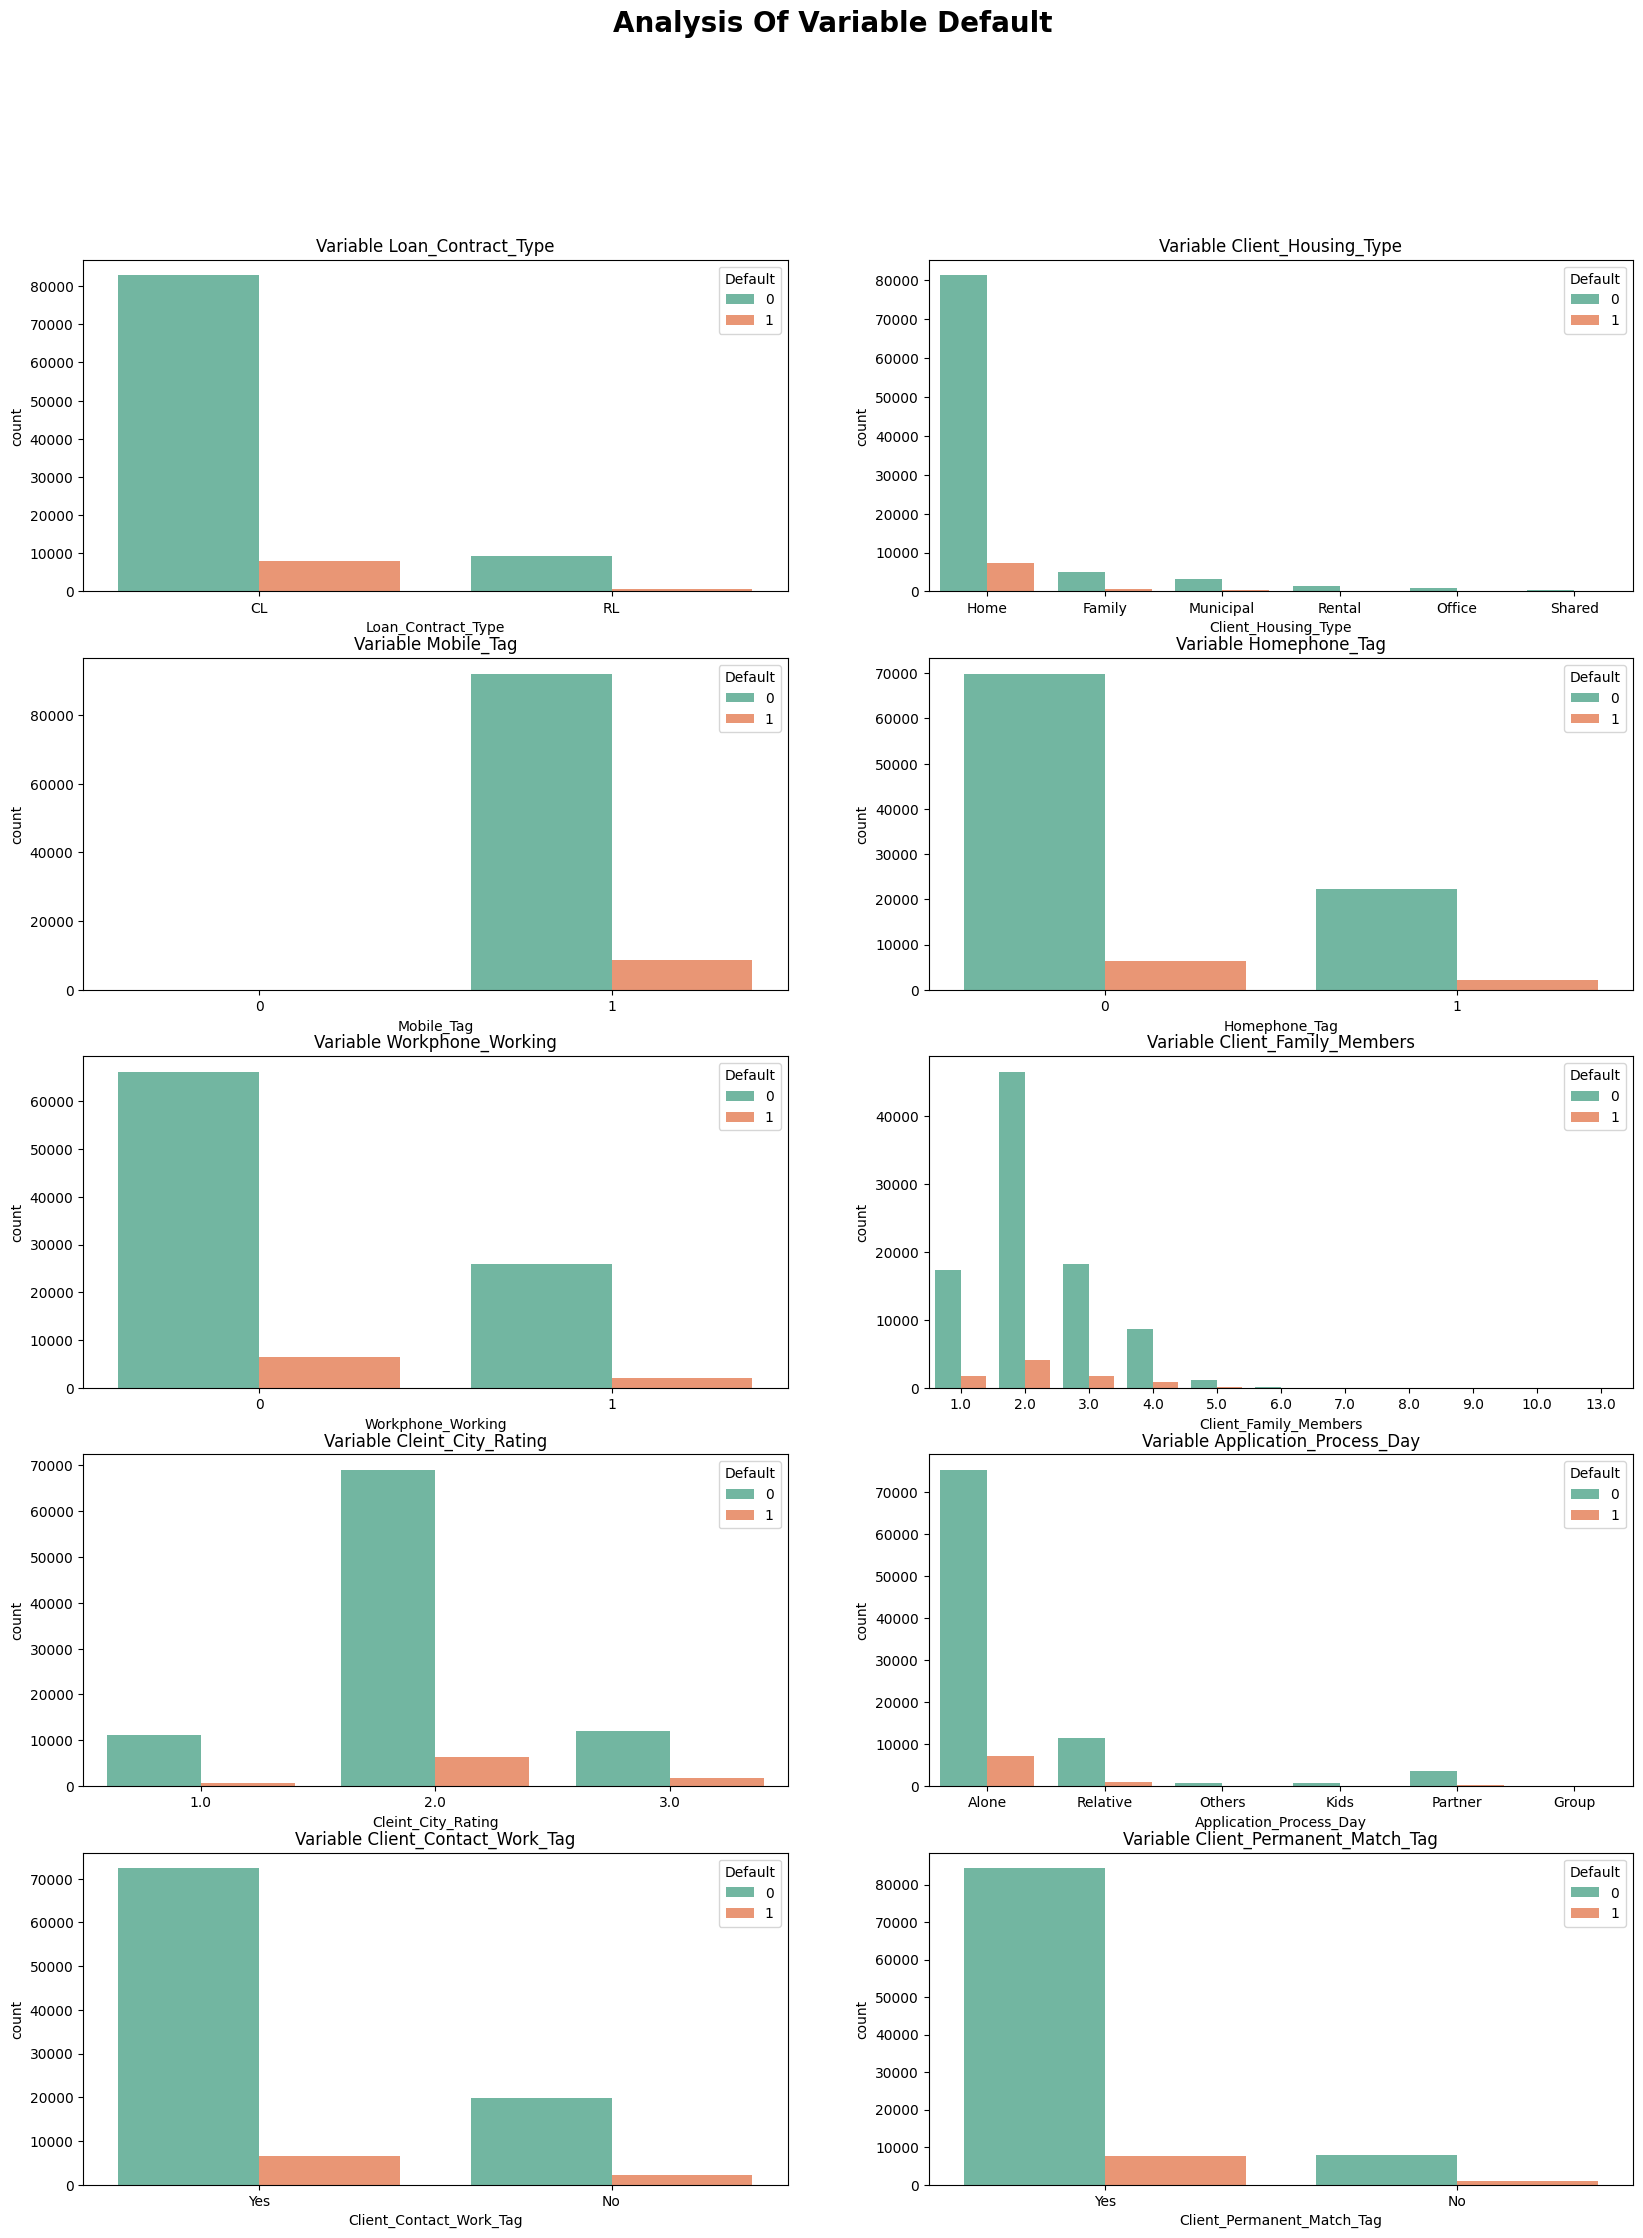

In [60]:
plt.figure(figsize = (20, 25))
plt.suptitle("Analysis Of Variable Default",fontweight="bold", fontsize=20)

plt.subplot(5, 2, 1)
plt.gca().set_title('Variable Loan_Contract_Type')
sns.countplot(x = 'Loan_Contract_Type', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 2)
plt.gca().set_title('Variable Client_Housing_Type')
sns.countplot(x = 'Client_Housing_Type', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 3)
plt.gca().set_title('Variable Mobile_Tag')
sns.countplot(x = 'Mobile_Tag', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 4)
plt.gca().set_title('Variable Homephone_Tag')
sns.countplot(x = 'Homephone_Tag', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 5)
plt.gca().set_title('Variable Workphone_Working')
sns.countplot(x = 'Workphone_Working', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 6)
plt.gca().set_title('Variable Client_Family_Members')
sns.countplot(x = 'Client_Family_Members', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 7)
plt.gca().set_title('Variable Cleint_City_Rating')
sns.countplot(x = 'Cleint_City_Rating', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 8)
plt.gca().set_title('Variable Application_Process_Day')
sns.countplot(x = 'Application_Process_Day', hue = 'Default', palette = 'Set2', data = df)
            
plt.subplot(5, 2, 9)
plt.gca().set_title('Variable Client_Contact_Work_Tag')
sns.countplot(x = 'Client_Contact_Work_Tag', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(5, 2, 10)
plt.gca().set_title('Variable Client_Permanent_Match_Tag')
sns.countplot(x = 'Client_Permanent_Match_Tag', hue = 'Default', palette = 'Set2', data = df)

<Axes: title={'center': 'Variable Credit_Bureau'}, xlabel='Credit_Bureau', ylabel='count'>

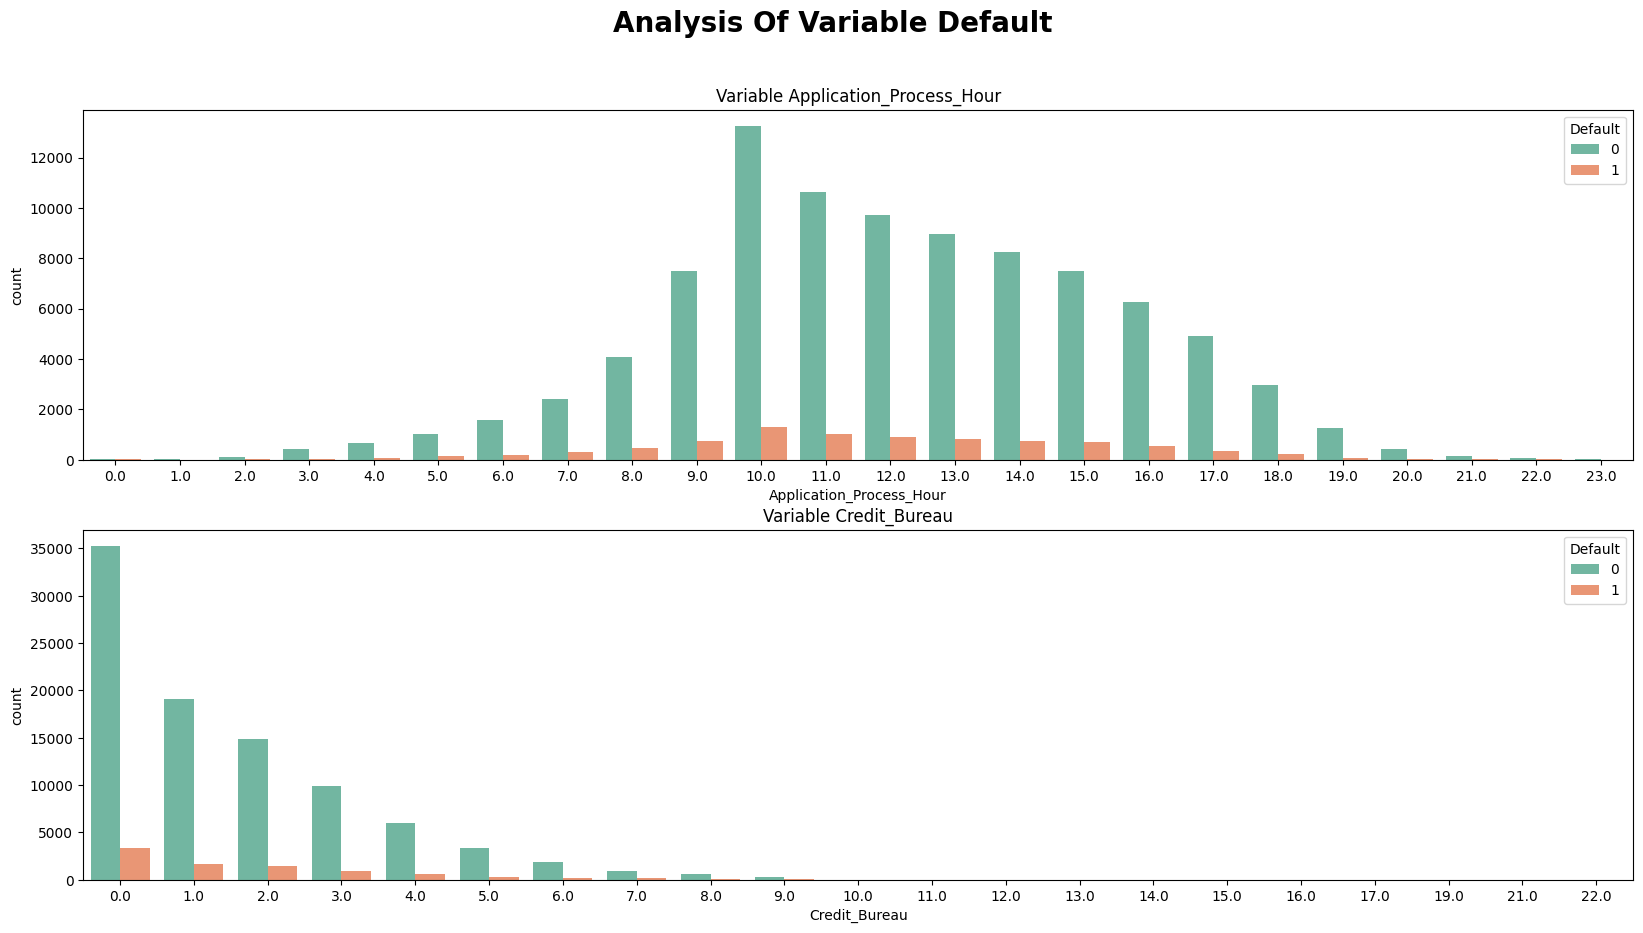

In [61]:
plt.figure(figsize = (20, 10))
plt.suptitle("Analysis Of Variable Default",fontweight="bold", fontsize=20)

plt.subplot(2, 1, 1)
plt.gca().set_title('Variable Application_Process_Hour')
sns.countplot(x = 'Application_Process_Hour', hue = 'Default', palette = 'Set2', data = df)

plt.subplot(2, 1, 2)
plt.gca().set_title('Variable Credit_Bureau')
sns.countplot(x = 'Credit_Bureau', hue = 'Default', palette = 'Set2', data = df)

When we look at our continuous variables, one variable caught my attention, when we look at the Score_Source_2 variable we can see that when the value is positive, this variable usually has a smaller value.

<Axes: xlabel='Default', ylabel='Phone_Change'>

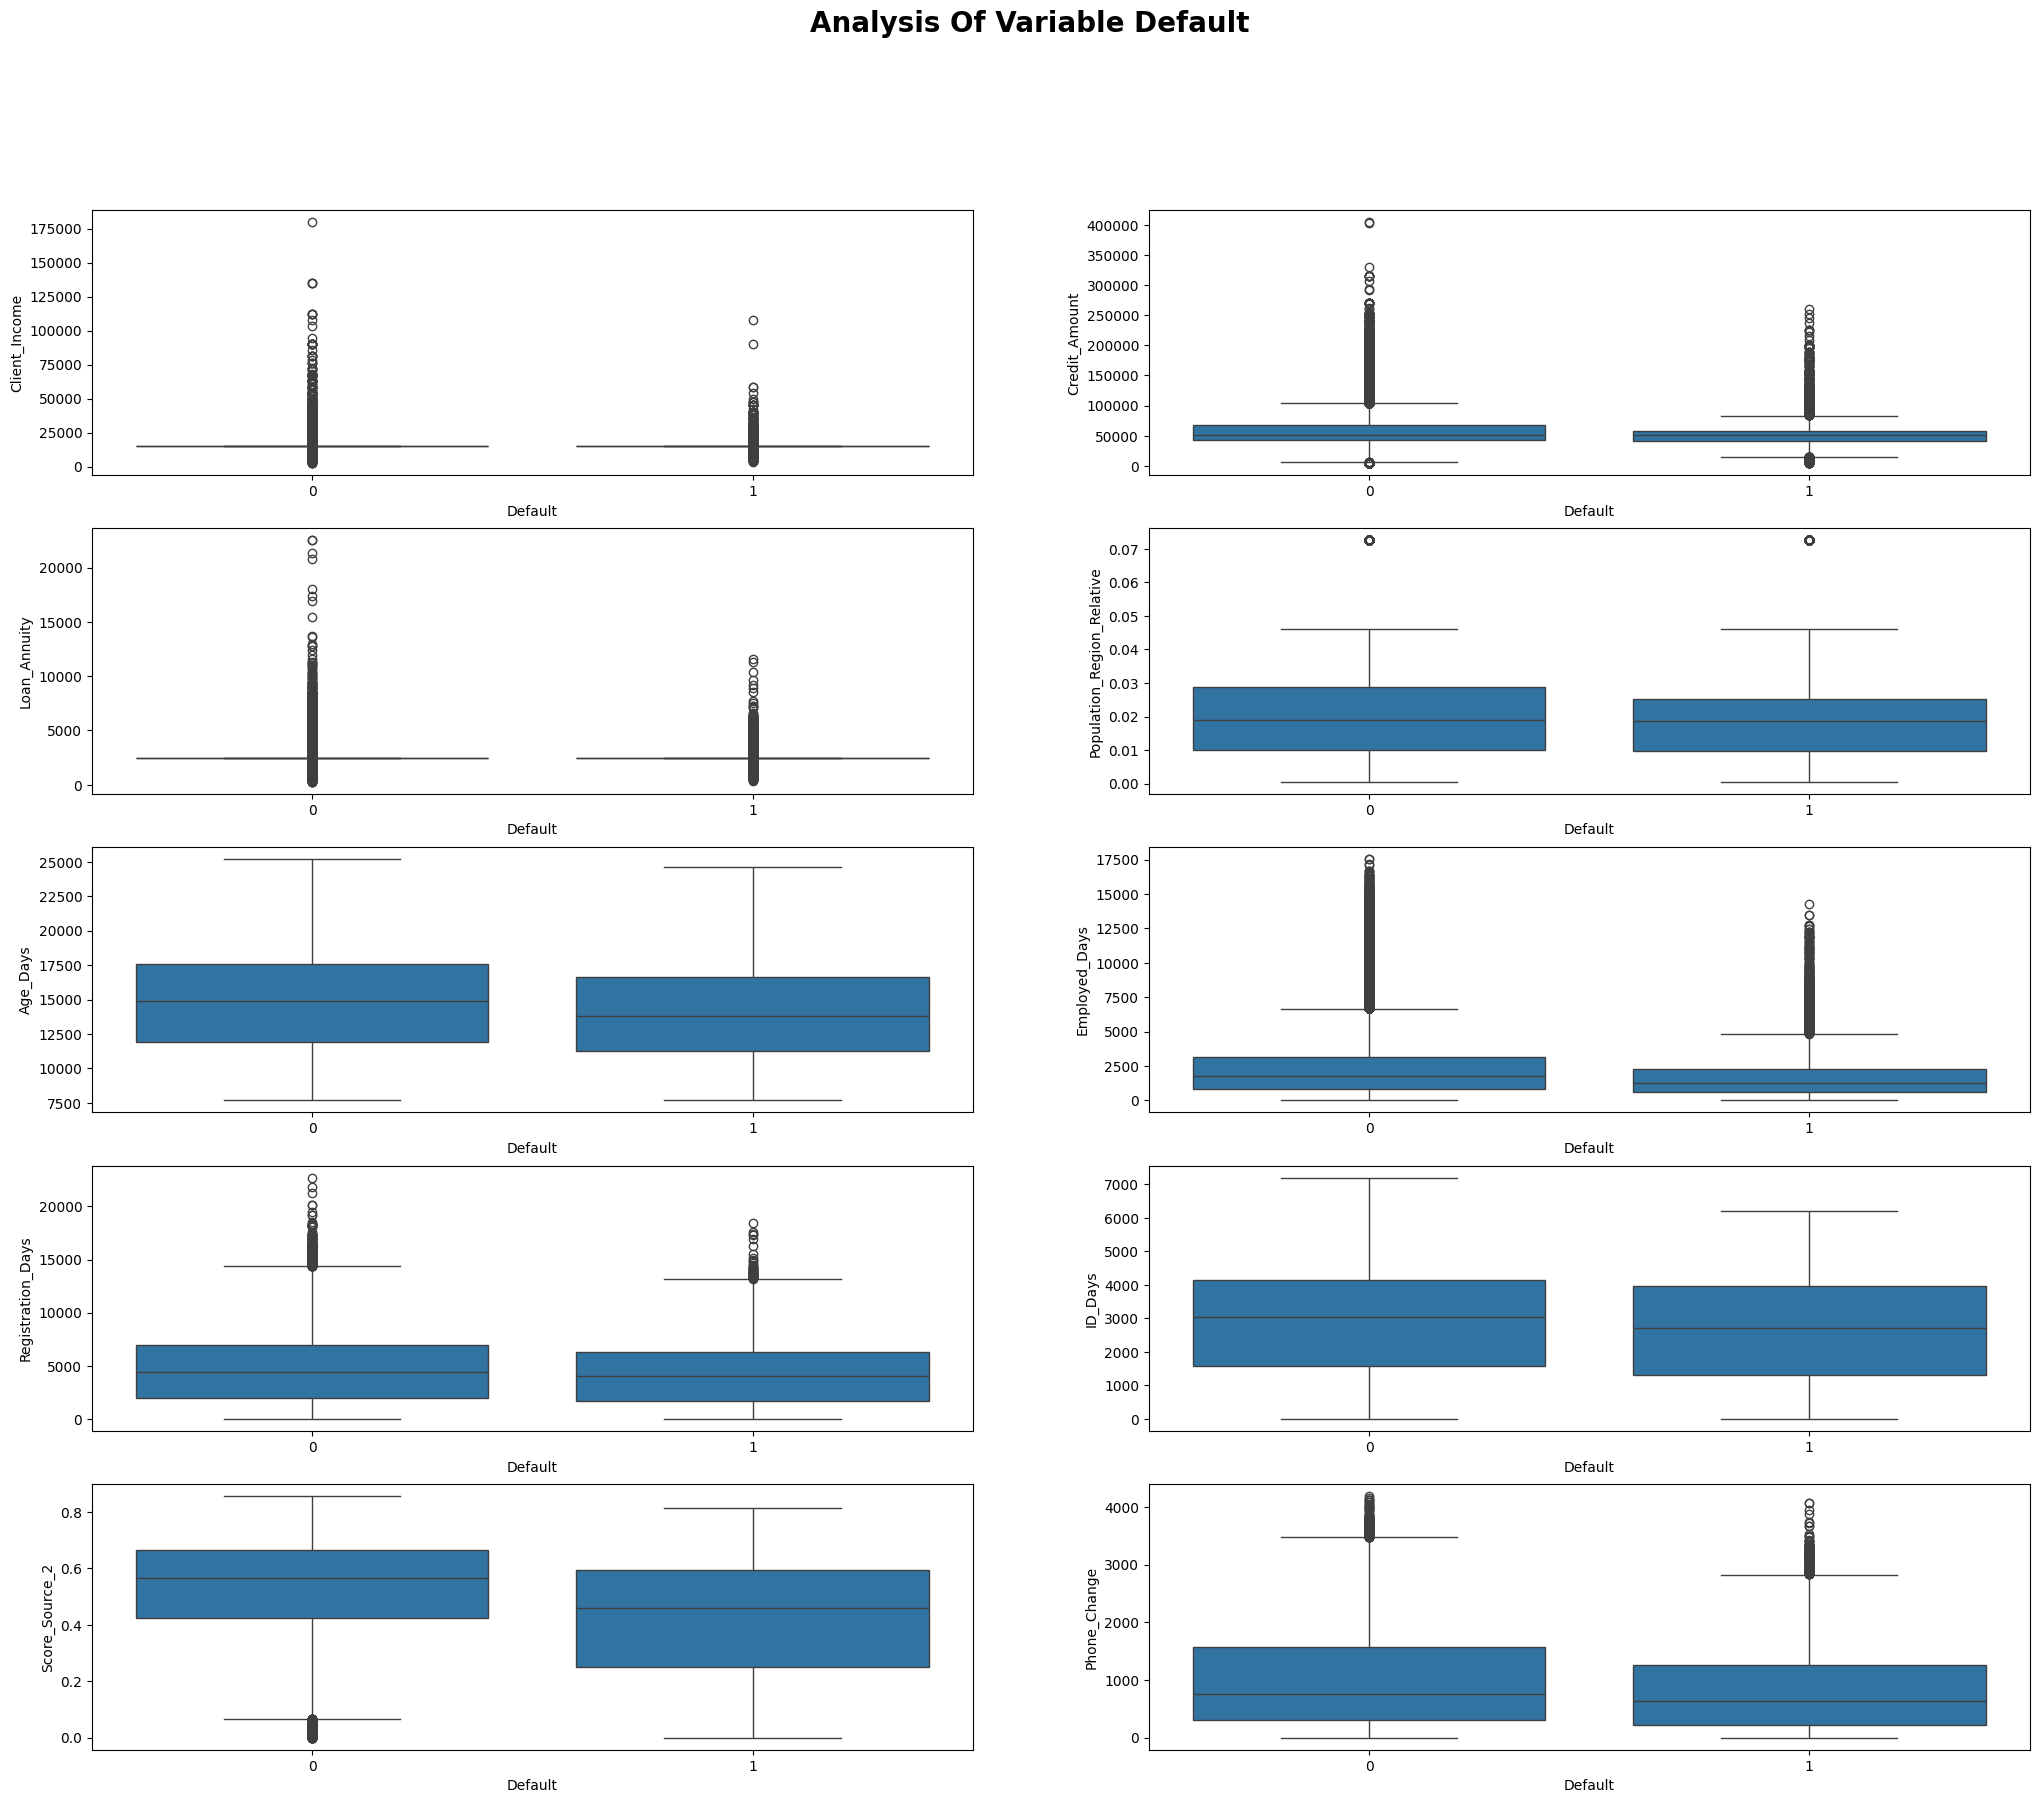

In [62]:
plt.figure(figsize = (25, 20))
plt.suptitle("Analysis Of Variable Default",fontweight="bold", fontsize=20)

plt.subplot(5,2,1)
sns.boxplot(x="Default", y="Client_Income", data=df)

plt.subplot(5,2,2)
sns.boxplot(x="Default", y="Credit_Amount", data=df)

plt.subplot(5,2,3)
sns.boxplot(x="Default", y="Loan_Annuity", data=df)

plt.subplot(5,2,4)
sns.boxplot(x="Default", y="Population_Region_Relative", data=df)

plt.subplot(5,2,5)
sns.boxplot(x="Default", y="Age_Days", data=df)

plt.subplot(5,2,6)
sns.boxplot(x="Default", y="Employed_Days", data=df)

plt.subplot(5,2,7)
sns.boxplot(x="Default", y="Registration_Days", data=df)

plt.subplot(5,2,8)
sns.boxplot(x="Default", y="ID_Days", data=df)

plt.subplot(5,2,9)
sns.boxplot(x="Default", y="Score_Source_2", data=df)

plt.subplot(5,2,10)
sns.boxplot(x="Default", y="Phone_Change", data=df)

Here we are going to transform this Score_Source_2 variable into a categorical variable.

In [180]:
def group(value):
    if value >= 0.8:
        return 0
    elif value >= 0.7  and value < 0.8:
        return 1
    elif value >= 0.6  and value < 0.7:
        return 2
    elif value >= 0.5  and value < 0.6:
        return 3
    elif value >= 0.4  and value < 0.5:
        return 4
    elif value >= 0.3  and value < 0.4:
        return 5
    elif value >= 0.2  and value < 0.3:
        return 6
    elif value >= 0.1  and value < 0.2:
        return 7
    else:
        return 8

In [181]:
df['score_group'] = df.apply(lambda x: group(x['Score_Source_2']),axis=1)

In [182]:
df = df.drop('Score_Source_2', axis = 1)

When we look at the Client_Gender variable we can see that we have only 3 values as XNA so let's remove that data, and when we look at the tag variable we can see that we practically don't have 0 values, so we'll just leave the 1 values

In [183]:
df = df[df['Client_Gender'] != 'XNA']
df = df[df['Mobile_Tag'] == 1]

In [184]:
df.head()

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  House_Own  \
0  12142509         6750.0        0.0         0.0          1.0        0.0   
1  12138936        20250.0        1.0         0.0          1.0        1.0   
2  12181264        18000.0        0.0         0.0          1.0        0.0   
4  12133385        33750.0        1.0         0.0          1.0        0.0   
5  12191614        11250.0        0.0         1.0          1.0        1.0   

   Child_Count  Credit_Amount  Loan_Annuity Accompany_Client  ...  \
0          0.0       61190.55       3416.85            Alone  ...   
1          0.0       15282.00       1826.55            Alone  ...   
2          1.0       59527.35       2788.20            Alone  ...   
4          2.0      133988.40       3547.35            Alone  ...   
5          1.0       13752.00        653.85            Alone  ...   

  Cleint_City_Rating Application_Process_Day Application_Process_Hour  \
0                2.0                   Alone                     17.0   
1                2.0                   Alone                     10.0   
2                2.0                   Alone                     10.0   
4                1.0                   Alone                     10.0   
5                2.0                   Alone                     10.0   

  Client_Permanent_Match_Tag Client_Contact_Work_Tag       Type_Organization  \
0                        Yes                     Yes           Self-employed   
1                        Yes                     Yes              Government   
2                        Yes                     Yes           Self-employed   
4                        Yes                     Yes  Business Entity Type 3   
5                        Yes                     Yes                   Other   

   Phone_Change  Credit_Bureau  Default  score_group  
0          63.0            0.0        0            4  
1         755.0            0.0        0            6  
2         277.0            0.0        0            3  
4         674.0            1.0        0            5  
5         739.0            0.0        0            2  

[5 rows x 35 columns]

In [185]:
cat_columns = df.select_dtypes(include='object').columns

print(cat_columns)

Index(['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Application_Process_Day',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization'],
      dtype='object')


Model Building.

FIrst step is to convert the values in the  categorical columns  into  numerical Data

In [186]:
categorical_columns=['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Application_Process_Day',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization']

In [187]:
for cat_col in categorical_columns:
    
    columns = {} 
    i   = 0
    for  temp_col in df[cat_col].unique():
        columns[str(temp_col)] = i
        i+=1
    print(cat_col, ":" , columns)
    df["new_{}".format(cat_col)] = df[cat_col].apply(lambda x: columns[str(x)])

Accompany_Client : {'Alone': 0, 'Relative': 1, 'Others': 2, 'Kids': 3, 'Partner': 4, 'Group': 5}
Client_Income_Type : {'Commercial': 0, 'Service': 1, 'Govt Job': 2, 'Retired': 3, 'Student': 4, 'Maternity leave': 5, 'Unemployed': 6, 'Businessman': 7}
Client_Education : {'Secondary': 0, 'Graduation': 1, 'Graduation dropout': 2, 'Junior secondary': 3, 'Post Grad': 4}
Client_Marital_Status : {'M': 0, 'W': 1, 'S': 2, 'D': 3}
Client_Gender : {'Male': 0, 'Female': 1}
Loan_Contract_Type : {'CL': 0, 'RL': 1}
Client_Housing_Type : {'Home': 0, 'Family': 1, 'Municipal': 2, 'Rental': 3, 'Office': 4, 'Shared': 5}
Application_Process_Day : {'Alone': 0, 'Relative': 1, 'Others': 2, 'Kids': 3, 'Partner': 4, 'Group': 5}
Client_Permanent_Match_Tag : {'Yes': 0, 'No': 1}
Client_Contact_Work_Tag : {'Yes': 0, 'No': 1}
Type_Organization : {'Self-employed': 0, 'Government': 1, 'Business Entity Type 3': 2, 'Other': 3, 'Industry: type 3': 4, 'Business Entity Type 2': 5, 'Business Entity Type 1': 6, 'Transport: ty

In [188]:
Accompany_Client ={'Alone': 0, 'Relative': 1, 'Others': 2, 'Kids': 3, 'Partner': 4, 'Group': 5}
Client_Income_Type ={'Commercial': 0, 'Service': 1, 'Govt Job': 2, 'Retired': 3, 'Student': 4, 'Maternity leave': 5, 'Unemployed': 6, 'Businessman': 7}
Client_Education={'Secondary': 0, 'Graduation': 1, 'Graduation dropout': 2, 'Junior secondary': 3, 'Post Grad': 4}
Client_Marital_Status ={'M': 0, 'W': 1, 'S': 2, 'D': 3}
Client_Gender = {'Male': 0, 'Female': 1}
Loan_Contract_Type = {'CL': 0, 'RL': 1}
Client_Housing_Type = {'Home': 0, 'Family': 1, 'Municipal': 2, 'Rental': 3, 'Office': 4, 'Shared': 5}
Application_Process_Day ={'Alone': 0, 'Relative': 1, 'Others': 2, 'Kids': 3, 'Partner': 4, 'Group': 5}
Client_Permanent_Match_Tag = {'Yes': 0, 'No': 1}
Client_Contact_Work_Tag = {'Yes': 0, 'No': 1}
Type_Organization = {'Self-employed': 0, 'Government': 1, 'Business Entity Type 3': 2, 'Other': 3, 'Industry: type 3': 4, 'Business Entity Type 2': 5, 'Business Entity Type 1': 6, 'Transport: type 4': 7, 'Construction': 8, 'Kindergarten': 9, 'Trade: type 3': 10, 'Industry: type 2': 11, 'Trade: type 7': 12, 'Trade: type 2': 13, 'Agriculture': 14, 'Military': 15, 'Medicine': 16, 'XNA': 17, 'Housing': 18, 'Industry: type 1': 19, 'Industry: type 11': 20, 'Bank': 21, 'School': 22, 'Industry: type 9': 23, 'Postal': 24, 'University': 25, 'Transport: type 2': 26, 'Restaurant': 27, 'Electricity': 28, 'Police': 29, 'Industry: type 4': 30, 'Security Ministries': 31, 'Services': 32, 'Transport: type 3': 33, 'Mobile': 34, 'Hotel': 35, 'Security': 36, 'Industry: type 7': 37, 'Advertising': 38, 'Cleaning': 39, 'Realtor': 40, 'Trade: type 6': 41, 'Culture': 42, 'Industry: type 5': 43, 'Telecom': 44, 'Trade: type 1': 45, 'Industry: type 12': 46, 'Industry: type 8': 47, 'Insurance': 48, 'Emergency': 49, 'Legal Services': 50, 'Industry: type 10': 51, 'Trade: type 4': 52, 'Industry: type 6': 53, 'Transport: type 1': 54, 'Industry: type 13': 55, 'Religion': 56, 'Trade: type 5': 57}

In [189]:
df['Accompany_Client'] =df['Accompany_Client'].map(Accompany_Client)
df['Client_Income_Type'] =df['Client_Income_Type'].map(Client_Income_Type)
df['Client_Education'] =df['Client_Education'].map(Client_Education)
df['Client_Marital_Status'] =df['Client_Marital_Status'].map(Client_Marital_Status)
df['Client_Gender'] =df['Client_Gender'].map(Client_Gender)
df['Loan_Contract_Type'] =df['Loan_Contract_Type'].map(Loan_Contract_Type)
df['Client_Housing_Type'] =df['Client_Housing_Type'].map(Client_Housing_Type)
df['Application_Process_Day'] =df['Application_Process_Day'].map(Application_Process_Day)
df['Client_Permanent_Match_Tag'] =df['Client_Permanent_Match_Tag'].map(Client_Permanent_Match_Tag)
df['Client_Contact_Work_Tag'] =df['Client_Contact_Work_Tag'].map(Client_Contact_Work_Tag)
df['Type_Organization'] =df['Type_Organization'].map(Type_Organization)

In [190]:
df

ID  Client_Income  Car_Owned  Bike_Owned  Active_Loan  \
0       12142509         6750.0        0.0         0.0          1.0   
1       12138936        20250.0        1.0         0.0          1.0   
2       12181264        18000.0        0.0         0.0          1.0   
4       12133385        33750.0        1.0         0.0          1.0   
5       12191614        11250.0        0.0         1.0          1.0   
...          ...            ...        ...         ...          ...   
121851  12207714        29250.0        0.0         0.0          0.0   
121852  12173765        15750.0        0.0         1.0          1.0   
121853  12103937         8100.0        0.0         1.0          0.0   
121854  12170623        38250.0        1.0         1.0          0.0   
121855  12105610         9000.0        1.0         1.0          1.0   

        House_Own  Child_Count  Credit_Amount  Loan_Annuity  Accompany_Client  \
0             0.0          0.0       61190.55       3416.85                 0   
1             1.0          0.0       15282.00       1826.55                 0   
2             0.0          1.0       59527.35       2788.20                 0   
4             0.0          2.0      133988.40       3547.35                 0   
5             1.0          1.0       13752.00        653.85                 0   
...           ...          ...            ...           ...               ...   
121851        1.0          0.0      107820.00       2499.75                 1   
121852        0.0          0.0      104256.00       2499.75                 0   
121853        1.0          1.0       55107.90       2499.75                 0   
121854        1.0          0.0       45000.00       2499.75                 0   
121855        1.0          1.0       62428.95       2499.75                 0   

        ...  new_Client_Income_Type  new_Client_Education  \
0       ...                       0                     0   
1       ...                       1                     1   
2       ...                       1                     2   
4       ...                       0                     0   
5       ...                       1                     0   
...     ...                     ...                   ...   
121851  ...                       1                     0   
121852  ...                       0                     1   
121853  ...                       2                     0   
121854  ...                       1                     1   
121855  ...                       0                     0   

        new_Client_Marital_Status  new_Client_Gender  new_Loan_Contract_Type  \
0                               0                  0                       0   
1                               0                  0                       0   
2                               1                  0                       0   
4                               0                  1                       0   
5                               1                  1                       0   
...                           ...                ...                     ...   
121851                          0                  1                       0   
121852                          0                  1                       0   
121853                          0                  0                       0   
121854                          0                  1                       0   
121855                          2                  0                       0   

        new_Client_Housing_Type  new_Application_Process_Day  \
0                             0                            0   
1                             0                            0   
2                             1                            0   
4                             0                            0   
5                             0                            0   
...                         ...                          ...   
121851                        0               

In [191]:
df = df.drop('ID', axis = 1)

In [192]:
df = df.sort_index(axis=1)
df

Accompany_Client  Active_Loan  Age_Days  Application_Process_Day  \
0                      0          1.0   13957.0                        0   
1                      0          1.0   14162.0                        0   
2                      0          1.0   16790.0                        0   
4                      0          1.0   11366.0                        0   
5                      0          1.0   13881.0                        0   
...                  ...          ...       ...                      ...   
121851                 1          0.0   15741.5                        1   
121852                 0          1.0   15741.5                        0   
121853                 0          0.0   15741.5                        0   
121854                 0          0.0   15741.5                        0   
121855                 0          1.0   15741.5                        0   

        Application_Process_Hour  Bike_Owned  Car_Owned  Child_Count  \
0                           17.0         0.0        0.0          0.0   
1                           10.0         0.0        1.0          0.0   
2                           10.0         0.0        0.0          1.0   
4                           10.0         0.0        1.0          2.0   
5                           10.0         1.0        0.0          1.0   
...                          ...         ...        ...          ...   
121851                      16.0         0.0        0.0          0.0   
121852                      12.0         1.0        0.0          0.0   
121853                      11.0         1.0        0.0          1.0   
121854                      12.0         1.0        1.0          0.0   
121855                       6.0         1.0        1.0          1.0   

        Cleint_City_Rating  Client_Contact_Work_Tag  ...  \
0                      2.0                        0  ...   
1                      2.0                        0  ...   
2                      2.0                        0  ...   
4                      1.0                        0  ...   
5                      2.0                        0  ...   
...                    ...                      ...  ...   
121851                 2.0                        1  ...   
121852                 3.0                        0  ...   
121853                 3.0                        1  ...   
121854                 2.0                        0  ...   
121855                 3.0                        0  ...   

        new_Client_Contact_Work_Tag  new_Client_Education  new_Client_Gender  \
0                                 0                     0                  0   
1                                 0                     1                  0   
2                                 0                     2                  0   
4                                 0                     0                  1   
5                                 0                     0                  1   
...                             ...                   ...                ...   
121851                            1                     0                  1   
121852                            0                     1                  1   
121853                            1                     0                  0   
121854                            0                     1                  1   
121855                            0                     0                  0   

        new_Client_Housing_Type  new_Client_Income_Type  \
0                             0                       0   
1                             0                       1   
2                             1                       1   
4                             0                       0   
5                             0                       1   
...                         ...                     ...   
121851                        0                       1   
121852                        0                       0   
121853           

Separating into features variables and target variable

In [193]:
X = df.drop('Default', axis = 1)
y = df['Default']

Checking the skewness in the data

In [194]:
X.skew()

Accompany_Client                  3.261352
Active_Loan                       0.066008
Age_Days                          0.157630
Application_Process_Day           3.261352
Application_Process_Hour         -0.019988
Bike_Owned                        0.759230
Car_Owned                         0.568501
Child_Count                       1.907100
Cleint_City_Rating                0.040298
Client_Contact_Work_Tag           1.393686
Client_Education                  1.781343
Client_Family_Members             0.905781
Client_Gender                     0.548877
Client_Housing_Type               3.775826
Client_Income                     3.705009
Client_Income_Type                0.592106
Client_Marital_Status             1.526683
Client_Permanent_Match_Tag        2.927687
Credit_Amount                     2.825071
Credit_Bureau                     1.405401
Employed_Days                     2.089534
Homephone_Tag                     1.220803
House_Own                        -0.814278
ID_Days    

In [195]:
cols=X.columns
cols

Index(['Accompany_Client', 'Active_Loan', 'Age_Days',
       'Application_Process_Day', 'Application_Process_Hour', 'Bike_Owned',
       'Car_Owned', 'Child_Count', 'Cleint_City_Rating',
       'Client_Contact_Work_Tag', 'Client_Education', 'Client_Family_Members',
       'Client_Gender', 'Client_Housing_Type', 'Client_Income',
       'Client_Income_Type', 'Client_Marital_Status',
       'Client_Permanent_Match_Tag', 'Credit_Amount', 'Credit_Bureau',
       'Employed_Days', 'Homephone_Tag', 'House_Own', 'ID_Days',
       'Loan_Annuity', 'Loan_Contract_Type', 'Mobile_Tag', 'Phone_Change',
       'Population_Region_Relative', 'Registration_Days', 'Type_Organization',
       'Workphone_Working', 'new_Accompany_Client',
       'new_Application_Process_Day', 'new_Client_Contact_Work_Tag',
       'new_Client_Education', 'new_Client_Gender', 'new_Client_Housing_Type',
       'new_Client_Income_Type', 'new_Client_Marital_Status',
       'new_Client_Permanent_Match_Tag', 'new_Loan_Contract_Type

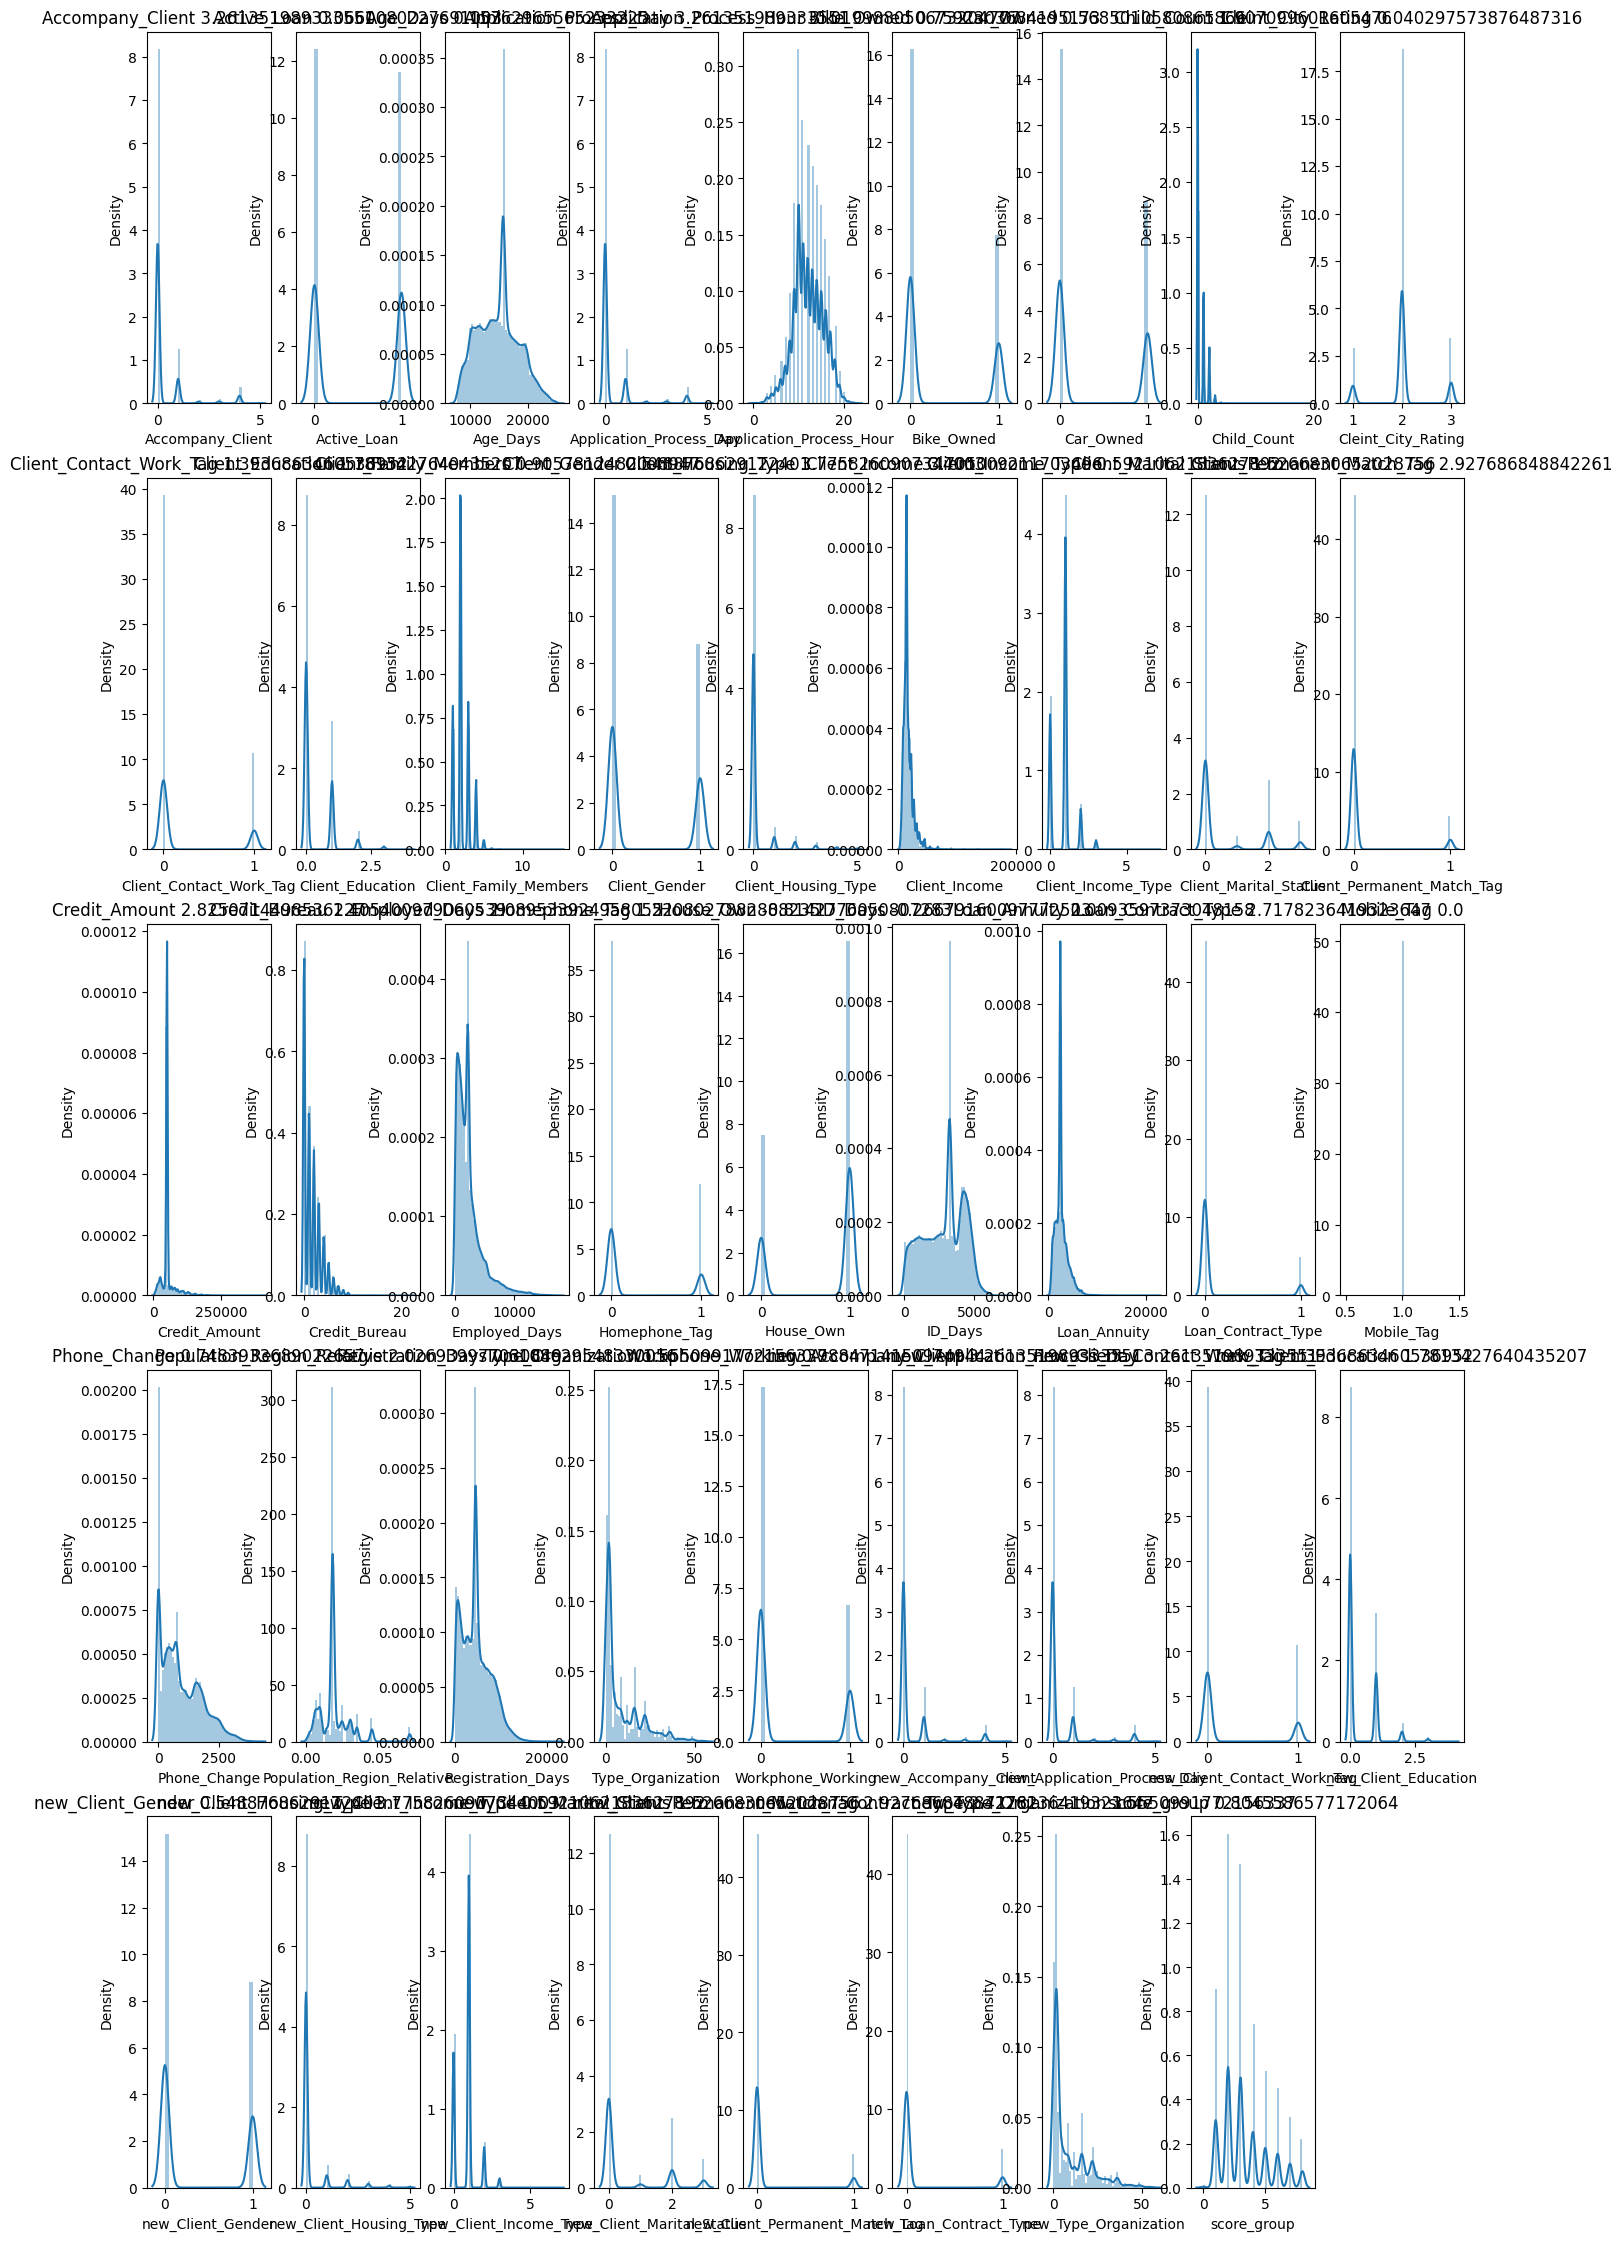

In [196]:
k = 0
plt.figure(figsize = (17, 28))

for col in cols :
  k = k + 1
  plt.subplot(5, 9, k)
  sns.distplot(X[col])
  plt.title(col+' '+str(X[col].skew()))

Mitigating the skewness

In [197]:
pt = PowerTransformer(method = 'yeo-johnson', standardize = True, copy = False)

X[cols] = pt.fit_transform(X)

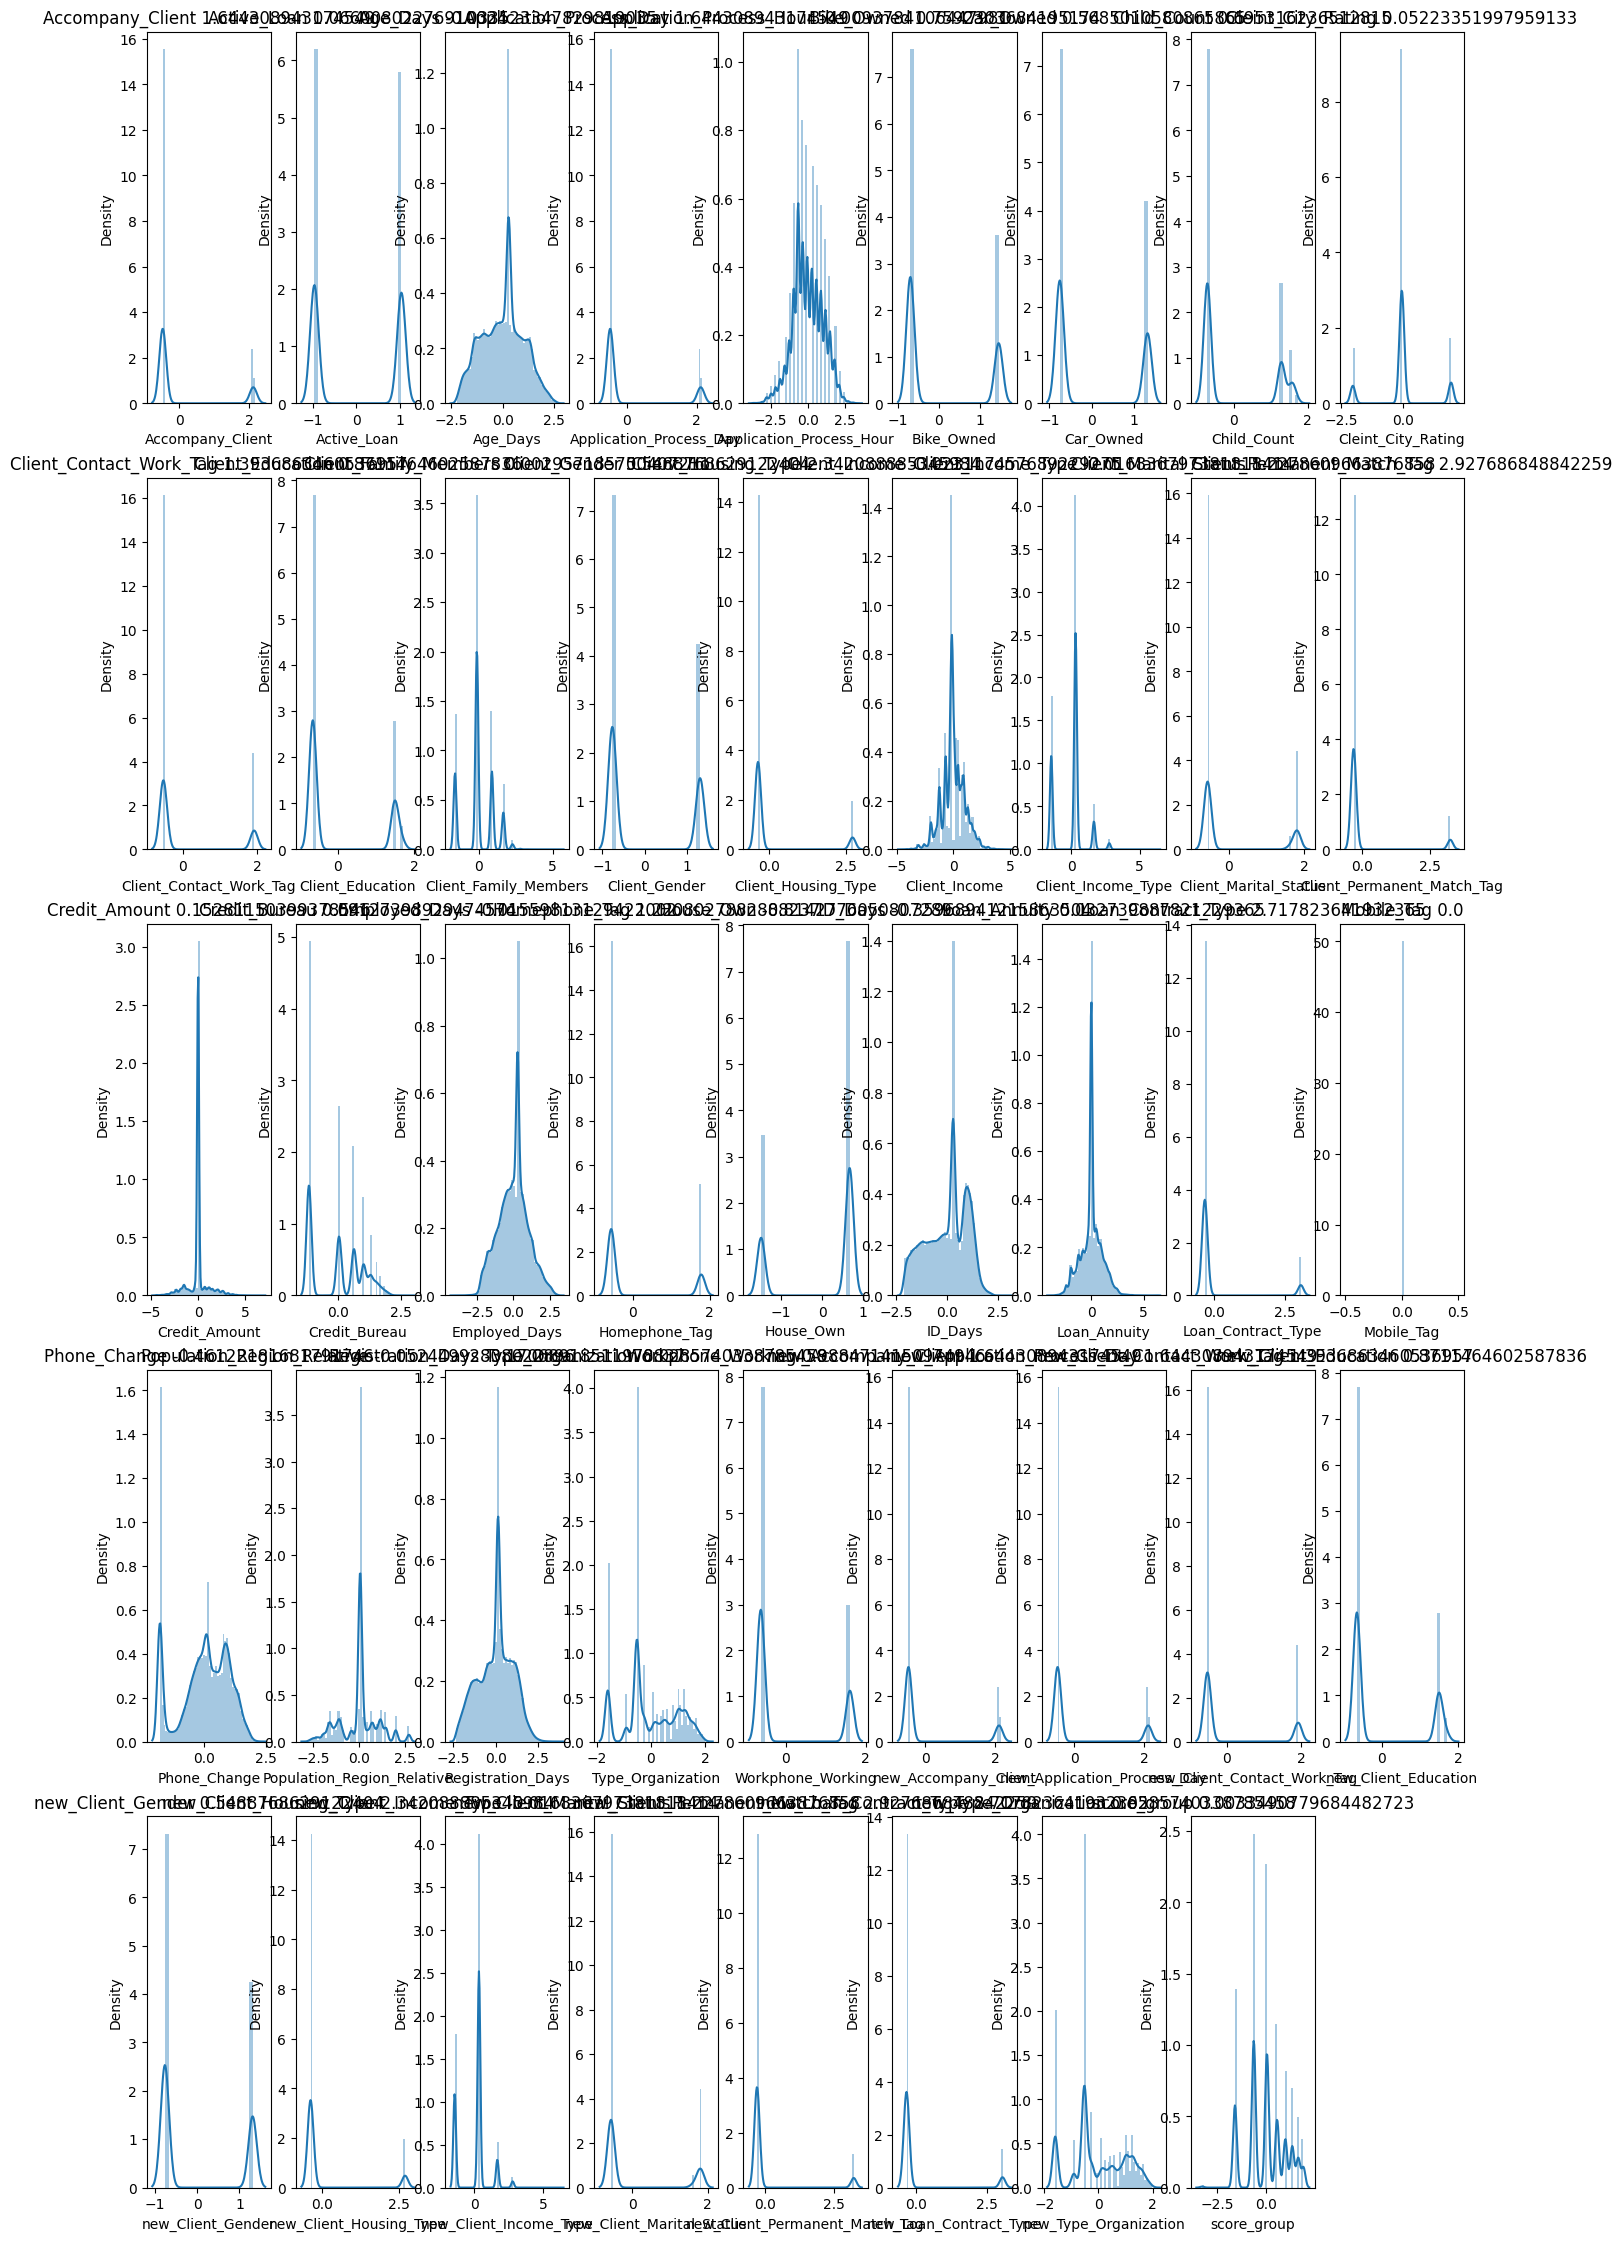

In [198]:
k=0
plt.figure(figsize=(17,28))
for col in cols:
    k=k+1
    plt.subplot(5,9,k)
    sns.distplot(X[col])
    plt.title(col+' '+str(X[col].skew()))

StandardScaler


Here we will use StandardScaler to put our data in the same scale.

In [199]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

Transforming Data into Train and Test, here we will use 30% of our data to test the machine learning models

In [207]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X_standard, y, test_size = 0.3, random_state = 42)

In [208]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(71388, 44)
(30596, 44)
(71388,)
(30596,)


In [203]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [204]:
y_train_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [205]:
print("train evaluation")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


print("test evaluation")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


train evaluation
[[65289     0]
 [ 6099     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     65289
           1       0.00      0.00      0.00      6099

    accuracy                           0.91     71388
   macro avg       0.46      0.50      0.48     71388
weighted avg       0.84      0.91      0.87     71388

test evaluation
[[27945     0]
 [ 2651     0]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27945
           1       0.00      0.00      0.00      2651

    accuracy                           0.91     30596
   macro avg       0.46      0.50      0.48     30596
weighted avg       0.83      0.91      0.87     30596



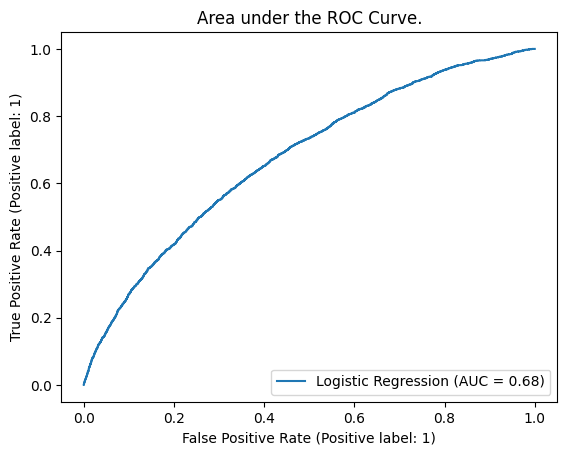

In [206]:
display = RocCurveDisplay.from_estimator(
   lr , X_test, y_test, name="Logistic Regression"
)
_ = display.ax_.set_title("Area under the ROC Curve.")

In [209]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [210]:
y_train_pred = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

In [211]:
print("train evaluation")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


print("test evaluation")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


train evaluation
[[65274    15]
 [ 5337   762]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     65289
           1       0.98      0.12      0.22      6099

    accuracy                           0.93     71388
   macro avg       0.95      0.56      0.59     71388
weighted avg       0.93      0.93      0.90     71388

test evaluation
[[27885    60]
 [ 2611    40]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27945
           1       0.40      0.02      0.03      2651

    accuracy                           0.91     30596
   macro avg       0.66      0.51      0.49     30596
weighted avg       0.87      0.91      0.87     30596



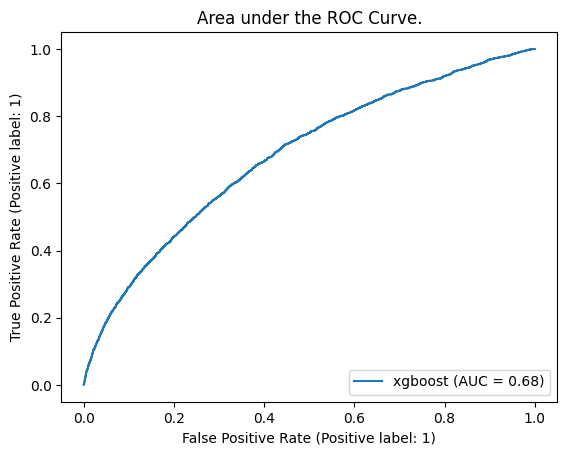

In [212]:
display = RocCurveDisplay.from_estimator(
   xgb , X_test, y_test, name="xgboost"
)
_ = display.ax_.set_title("Area under the ROC Curve.")

In [213]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [214]:
y_train_pred = dtc.predict(X_train)
y_pred = dtc.predict(X_test)

In [215]:
print("train evaluation")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


print("test evaluation")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


train evaluation
[[65289     0]
 [    0  6099]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65289
           1       1.00      1.00      1.00      6099

    accuracy                           1.00     71388
   macro avg       1.00      1.00      1.00     71388
weighted avg       1.00      1.00      1.00     71388

test evaluation
[[25545  2400]
 [ 2097   554]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92     27945
           1       0.19      0.21      0.20      2651

    accuracy                           0.85     30596
   macro avg       0.56      0.56      0.56     30596
weighted avg       0.86      0.85      0.86     30596



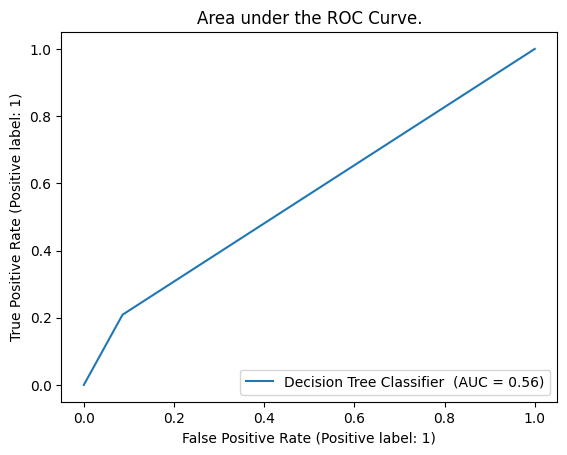

In [216]:
display = RocCurveDisplay.from_estimator(
   dtc , X_test, y_test, name="Decision Tree Classifier "
)
_ = display.ax_.set_title("Area under the ROC Curve.")

In [217]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [218]:
y_train_pred = gbc.predict(X_train)
y_pred = gbc.predict(X_test)

In [219]:
print("train evaluation")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


print("test evaluation")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


train evaluation
[[65285     4]
 [ 6077    22]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.96     65289
           1       0.85      0.00      0.01      6099

    accuracy                           0.91     71388
   macro avg       0.88      0.50      0.48     71388
weighted avg       0.91      0.91      0.87     71388

test evaluation
[[27938     7]
 [ 2646     5]]
              precision    recall  f1-score   support

           0       0.91      1.00      0.95     27945
           1       0.42      0.00      0.00      2651

    accuracy                           0.91     30596
   macro avg       0.67      0.50      0.48     30596
weighted avg       0.87      0.91      0.87     30596



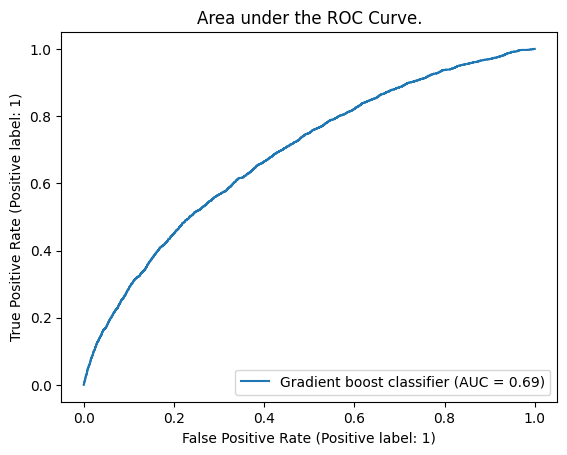

In [220]:
display = RocCurveDisplay.from_estimator(
   gbc , X_test, y_test, name="Gradient boost classifier"
)
_ = display.ax_.set_title("Area under the ROC Curve.")

In [221]:
rf=RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [222]:
y_train_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [223]:
print("train evaluation")
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))


print("test evaluation")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


train evaluation
[[65289     0]
 [    0  6099]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65289
           1       1.00      1.00      1.00      6099

    accuracy                           1.00     71388
   macro avg       1.00      1.00      1.00     71388
weighted avg       1.00      1.00      1.00     71388

test evaluation
[[27945     0]
 [ 2477   174]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27945
           1       1.00      0.07      0.12      2651

    accuracy                           0.92     30596
   macro avg       0.96      0.53      0.54     30596
weighted avg       0.93      0.92      0.89     30596



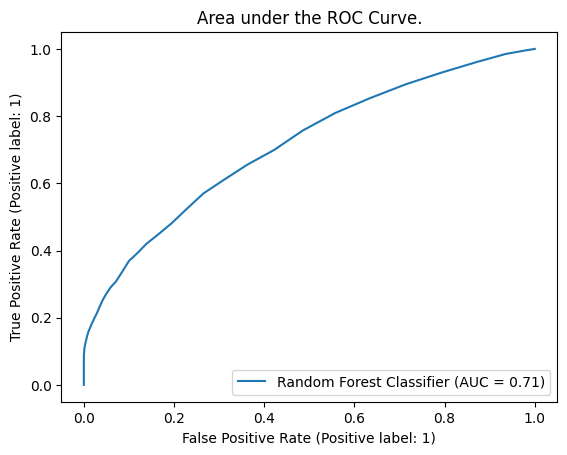

In [224]:
display = RocCurveDisplay.from_estimator(
   rf , X_test, y_test, name="Random Forest Classifier"
)
_ = display.ax_.set_title("Area under the ROC Curve.")

hyperparameters


folds = folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

params = {'max_depth': [3, 6, 9],
              'criterion': ['entropy', 'gini'],
              'n_estimators': [25, 50, 100, 150],
              'max_features': ['sqrt', 'log2', None],
              'max_leaf_nodes': [3, 6, 9]
             }

model_cv = GridSearchCV(estimator = RandomForestClassifier() ,
                        param_grid = params,
                        scoring = 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_train, y_train)

Models with Undersampling

In [225]:
rus=RandomUnderSampler()

In [226]:
X_train_rus,y_train_rus=rus.fit_resample(X_train, y_train)

In [227]:
print(X_train_rus.shape)
print(X_test.shape)
print(y_train_rus.shape)
print(y_test.shape)

(12198, 44)
(30596, 44)
(12198,)
(30596,)


In [228]:
rf=RandomForestClassifier()
rf.fit(X_train_rus, y_train_rus)

RandomForestClassifier()

In [229]:
y_train_pred = rf.predict(X_train_rus)
y_pred = rf.predict(X_test)

In [230]:
print("train evaluation")
print(confusion_matrix(y_train_rus, y_train_pred))
print(classification_report(y_train_rus, y_train_pred))


print("test evaluation")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


train evaluation
[[6099    0]
 [   0 6099]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6099
           1       1.00      1.00      1.00      6099

    accuracy                           1.00     12198
   macro avg       1.00      1.00      1.00     12198
weighted avg       1.00      1.00      1.00     12198

test evaluation
[[18788  9157]
 [ 1005  1646]]
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     27945
           1       0.15      0.62      0.24      2651

    accuracy                           0.67     30596
   macro avg       0.55      0.65      0.52     30596
weighted avg       0.88      0.67      0.74     30596



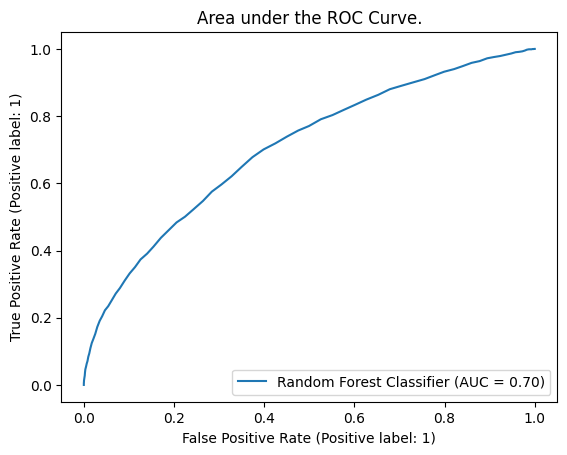

In [231]:
display = RocCurveDisplay.from_estimator(
   rf , X_test, y_test, name="Random Forest Classifier"
)
_ = display.ax_.set_title("Area under the ROC Curve.")

Models with Oversampling

In [232]:
ros=RandomOverSampler()

In [233]:
X_train_ros,y_train_ros=ros.fit_resample(X_train, y_train)

In [234]:
print(X_train_ros.shape)
print(X_test.shape)
print(y_train_ros.shape)
print(y_test.shape)

(130578, 44)
(30596, 44)
(130578,)
(30596,)


In [235]:
rf=RandomForestClassifier()
rf.fit(X_train_ros, y_train_ros)

RandomForestClassifier()

In [236]:
y_train_pred = rf.predict(X_train_ros)
y_pred = rf.predict(X_test)

In [237]:
print("train evaluation")
print(confusion_matrix(y_train_ros, y_train_pred))
print(classification_report(y_train_ros, y_train_pred))


print("test evaluation")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


train evaluation
[[65289     0]
 [    0 65289]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65289
           1       1.00      1.00      1.00     65289

    accuracy                           1.00    130578
   macro avg       1.00      1.00      1.00    130578
weighted avg       1.00      1.00      1.00    130578

test evaluation
[[27928    17]
 [ 2361   290]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27945
           1       0.94      0.11      0.20      2651

    accuracy                           0.92     30596
   macro avg       0.93      0.55      0.58     30596
weighted avg       0.92      0.92      0.89     30596



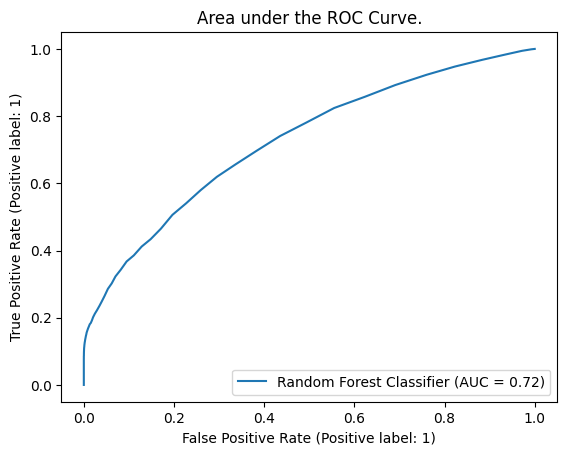

In [238]:
display = RocCurveDisplay.from_estimator(
   rf , X_test, y_test, name="Random Forest Classifier"
)
_ = display.ax_.set_title("Area under the ROC Curve.")

In [240]:
smt=SMOTE()

In [245]:
X_train_smt,y_train_smt=smt.fit_resample(X_train, y_train)

In [246]:
print(X_train_smt.shape)
print(X_test.shape)
print(y_train_smt.shape)
print(y_test.shape)

(130578, 44)
(30596, 44)
(130578,)
(30596,)


In [247]:
rf=RandomForestClassifier()
rf.fit(X_train_smt, y_train_smt)

RandomForestClassifier()

In [248]:
y_train_pred = rf.predict(X_train_smt)
y_pred = rf.predict(X_test)

In [249]:
print("train evaluation")
print(confusion_matrix(y_train_smt, y_train_pred))
print(classification_report(y_train_smt, y_train_pred))


print("test evaluation")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


train evaluation
[[65289     0]
 [    0 65289]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65289
           1       1.00      1.00      1.00     65289

    accuracy                           1.00    130578
   macro avg       1.00      1.00      1.00    130578
weighted avg       1.00      1.00      1.00    130578

test evaluation
[[27835   110]
 [ 2398   253]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27945
           1       0.70      0.10      0.17      2651

    accuracy                           0.92     30596
   macro avg       0.81      0.55      0.56     30596
weighted avg       0.90      0.92      0.89     30596



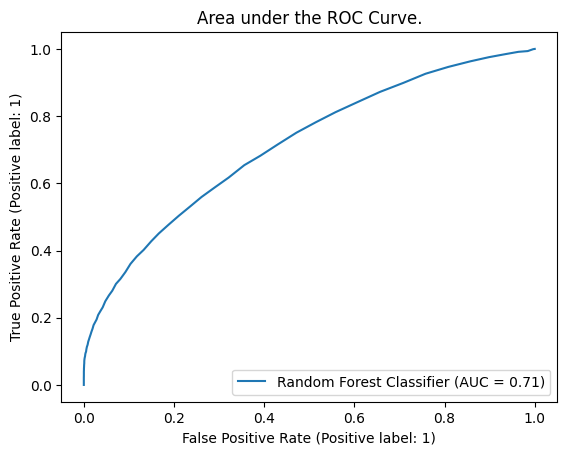

In [250]:
display = RocCurveDisplay.from_estimator(
   rf , X_test, y_test, name="Random Forest Classifier"
)
_ = display.ax_.set_title("Area under the ROC Curve.")

In [251]:
ads=ADASYN()

In [252]:
X_train_ads,y_train_ads=ads.fit_resample(X_train, y_train)

In [253]:
print(X_train_ads.shape)
print(X_test.shape)
print(y_train_ads.shape)
print(y_test.shape)

(129508, 44)
(30596, 44)
(129508,)
(30596,)


In [254]:
rf=RandomForestClassifier()
rf.fit(X_train_ads, y_train_ads)

RandomForestClassifier()

In [255]:
y_train_pred = rf.predict(X_train_ads)
y_pred = rf.predict(X_test)

In [256]:
print("train evaluation")
print(confusion_matrix(y_train_ads, y_train_pred))
print(classification_report(y_train_ads, y_train_pred))


print("test evaluation")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

train evaluation
[[65289     0]
 [    1 64218]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65289
           1       1.00      1.00      1.00     64219

    accuracy                           1.00    129508
   macro avg       1.00      1.00      1.00    129508
weighted avg       1.00      1.00      1.00    129508

test evaluation
[[27864    81]
 [ 2392   259]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27945
           1       0.76      0.10      0.17      2651

    accuracy                           0.92     30596
   macro avg       0.84      0.55      0.57     30596
weighted avg       0.91      0.92      0.89     30596



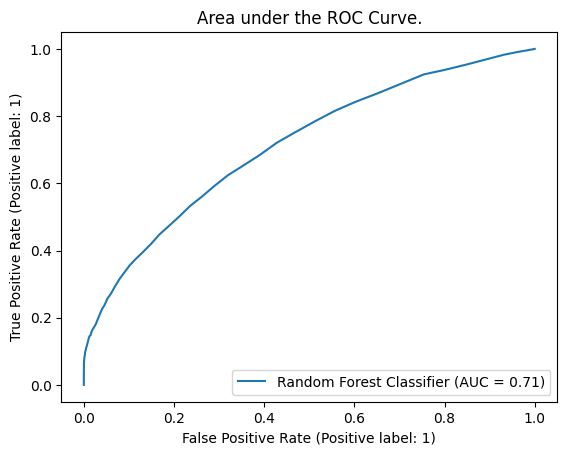

In [257]:
display = RocCurveDisplay.from_estimator(
   rf , X_test, y_test, name="Random Forest Classifier"
)
_ = display.ax_.set_title("Area under the ROC Curve.")

so the best performing model among all the models is random forest with oversampling.
Now tuning the hyperparameters to get best results.

folds = KFold(n_splits = 3, shuffle = True, random_state = 4)

params = {'max_depth': [3, 4, 5, 6,7,15,17,19,25],
              'min_samples_split': [2, 3, 4,7,11,15],
              'criterion': ['entropy', 'gini']
             }

model_cv = GridSearchCV(estimator = RandomForestClassifier() ,
                        param_grid = params,
                        scoring = 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_train_ros, y_train_ros)

In [258]:
folds = KFold(n_splits = 3, shuffle = True, random_state = 42)

params = {'max_depth': [3,5,7],
              'min_samples_split': [3,5,7],
              'criterion': ['entropy', 'gini']
             }

model_cv = GridSearchCV(estimator = RandomForestClassifier() ,
                        param_grid = params,
                        scoring = 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score = True)

model_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [3, 5, 7],
                         'min_samples_split': [3, 5, 7]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [259]:
model_cv.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 7}

In [260]:
rf1=RandomForestClassifier(criterion ='gini', max_depth = 7,min_samples_split = 7)
rf1.fit(X_train_ros, y_train_ros)

RandomForestClassifier(max_depth=7, min_samples_split=7)

In [261]:
y_train_pred = rf1.predict(X_train_ros)
y_pred = rf1.predict(X_test)

In [262]:
print("train evaluation")
print(confusion_matrix(y_train_ros, y_train_pred))
print(classification_report(y_train_ros, y_train_pred))


print("test evaluation")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


train evaluation
[[43913 21376]
 [20315 44974]]


              precision    recall  f1-score   support

           0       0.68      0.67      0.68     65289
           1       0.68      0.69      0.68     65289

    accuracy                           0.68    130578
   macro avg       0.68      0.68      0.68    130578
weighted avg       0.68      0.68      0.68    130578

test evaluation
[[18683  9262]
 [ 1073  1578]]
              precision    recall  f1-score   support

           0       0.95      0.67      0.78     27945
           1       0.15      0.60      0.23      2651

    accuracy                           0.66     30596
   macro avg       0.55      0.63      0.51     30596
weighted avg       0.88      0.66      0.74     30596



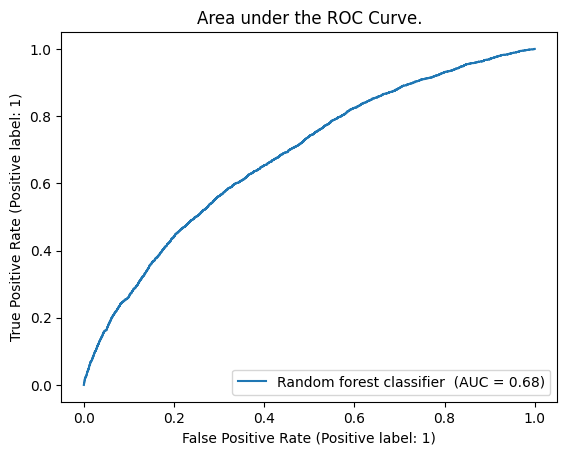

In [263]:
display = RocCurveDisplay.from_estimator(
   rf1 , X_test, y_test, name="Random forest classifier "
)
_ = display.ax_.set_title("Area under the ROC Curve.")

finally the conclusion part, 
The Best model which performs pretty well on basis of the  evaluation metrics ROC Curve is Random Forest Classifier(with Oversampling)  which have  Area Under ROC curve is 0.73.
So this is the model i selected for   predicting the default in test dataset .


In [264]:
Best_model=RandomForestClassifier()
Best_model.fit(X_train_ros, y_train_ros)

RandomForestClassifier()

In [265]:
y_train_pred = Best_model.predict(X_train_ros)
y_pred = Best_model.predict(X_test)

In [266]:
print("train evaluation")
print("===============")
print(confusion_matrix(y_train_ros, y_train_pred))
print(classification_report(y_train_ros, y_train_pred))


print("test evaluation")
print("===============")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


train evaluation
[[65289     0]
 [    0 65289]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     65289
           1       1.00      1.00      1.00     65289

    accuracy                           1.00    130578
   macro avg       1.00      1.00      1.00    130578
weighted avg       1.00      1.00      1.00    130578

test evaluation
[[27928    17]
 [ 2358   293]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     27945
           1       0.95      0.11      0.20      2651

    accuracy                           0.92     30596
   macro avg       0.93      0.55      0.58     30596
weighted avg       0.92      0.92      0.89     30596



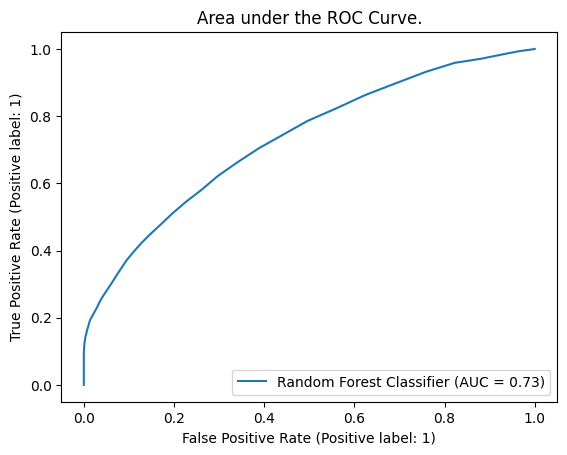

In [267]:
display = RocCurveDisplay.from_estimator(
   Best_model , X_test, y_test, name="Random Forest Classifier"
)
_ = display.ax_.set_title("Area under the ROC Curve.")

Saving the model

In [268]:

with open('model.pkl', 'wb') as file:
    pickle.dump(Best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)